# NetworkX - beagle Testing
------------------

- Test beagle implementation

### Import Libraries

In [1]:
import pandas as pd, numpy as np, networkx as nx
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.linear_model.logistic import LogisticRegression
pd.options.display.max_columns = 500
pd.options.display.max_colwidth = 500

/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


### Load Network Data

In [2]:
df_zeek = pd.read_json("combined_zeek.log", lines = True)
df_zeek.replace('nan', np.nan, inplace=True)
print(type(df_zeek))
print(df_zeek.shape)
#print(df_zeek.EventID.value_counts())
df_zeek.head()

<class 'pandas.core.frame.DataFrame'>
(2140, 148)


@stream              @system @proc            ts                 uid  \
0    conn  bobs.bigwheel.local  zeek  1.588205e+09  Cvf4XX17hSAgXDdGEd   
1    conn  bobs.bigwheel.local  zeek  1.588205e+09  CJ21Le4zsTUcyKKi98   
2    conn  bobs.bigwheel.local  zeek  1.588205e+09  CnOP7t1eGGHf6LFfuk   
3    conn  bobs.bigwheel.local  zeek  1.588205e+09  CvxbPE3MuO7boUdSc8   
4    conn  bobs.bigwheel.local  zeek  1.588205e+09  CuRbE21APSQo2qd6rk   

  id_orig_h  id_orig_p   id_resp_h  id_resp_p proto         service  \
0  10.0.1.6    54243.0    10.0.0.4       53.0   udp             dns   
1  10.0.1.6    56880.0    10.0.0.4      445.0   tcp  gssapi,smb,krb   
2  10.0.1.6    65108.0    10.0.0.4       53.0   udp             dns   
3  10.0.1.6      138.0  10.0.1.255      138.0   udp             NaN   
4  10.0.1.6      123.0    10.0.0.4      123.0   udp             NaN   

    duration  orig_bytes  resp_bytes conn_state  missed_bytes  history  \
0   0.001528        39.0        55.0         SF           0.0       Dd   
1  10.761077      4020.0      1681.0       RSTO           0.0  ShADdaR   
2   0.001599        36.0       104.0         SF           0.0       Dd   
3        NaN         NaN         NaN         S0           0.0        D   
4   0.003069       120.0       120.0         SF           0.0       Dd   

   orig_pkts  orig_ip_bytes  resp_pkts  resp_ip_bytes       orig_l2_addr  \
0        1.0           67.0        1.0           83.0  00:0d:3a:13:e3:69   
1       12.0         1307.0       11.0         2133.0  00:0d:3a:13:e3:69   
2        1.0           64.0        1.0          132.0  00:0d:3a:13:e3:69   
3        1.0          229.0        0.0            0.0  00:0d:3a:13:e3:69   
4        1.0          148.0        1.0          148.0  00:0d:3a:13:e3:69   

        resp_l2_addr  rtt named_pipe endpoint operation  trans_id query  \
0  12:34:56:78:9a:bc  NaN        NaN      NaN       NaN       NaN   NaN   
1  12:34:56:78:9a:bc  NaN        NaN      NaN       NaN       NaN   NaN   
2  12:34:56:78:9a:bc  NaN        NaN      NaN       NaN       NaN   NaN   
3  ff:ff:ff:ff:ff:ff  NaN        NaN      NaN       NaN       NaN   NaN   
4  12:34:56:78:9a:bc  NaN        NaN      NaN       NaN       NaN   NaN   

   qclass qclass_name  qtype qtype_name  rcode rcode_name  AA  TC  RD  RA   Z  \
0     NaN         NaN    NaN        NaN    NaN        NaN NaN NaN NaN NaN NaN   
1     NaN         NaN    NaN        NaN    NaN        NaN NaN NaN NaN NaN NaN   
2     NaN         NaN    NaN        NaN    NaN        NaN NaN NaN NaN NaN NaN   
3     NaN         NaN    NaN        NaN    NaN        NaN NaN NaN NaN NaN NaN   
4     NaN         NaN    NaN        NaN    NaN        NaN NaN NaN NaN NaN NaN   

  answers TTLs  rejected analyzer failure_reason fuid tx_hosts rx_hosts  \
0     NaN  NaN       NaN      NaN            NaN  NaN      NaN      NaN   
1     NaN  NaN       NaN      NaN            NaN  NaN      NaN      NaN   
2     NaN  NaN       NaN      NaN            NaN  NaN      NaN      NaN   
3     NaN  NaN       NaN      NaN            NaN  NaN      NaN      NaN   
4     NaN  NaN       NaN      NaN            NaN  NaN      NaN      NaN   

  conn_uids source  depth analyzers mime_type filename  is_orig  seen_bytes  \
0       NaN    NaN    NaN       NaN       NaN      NaN      NaN         NaN   
1       NaN    NaN    NaN       NaN       NaN      NaN      NaN         NaN   
2       NaN    NaN    NaN       NaN       NaN      NaN      NaN         NaN   
3       NaN    NaN    NaN       NaN       NaN      NaN      NaN         NaN   
4       NaN    NaN    NaN       NaN       NaN      NaN      NaN         NaN   

   total_bytes  missing_bytes  overflow_bytes  timedout  md5 sha1  \
0          NaN            NaN             NaN       NaN  NaN  NaN   
1          NaN            NaN             NaN       NaN  NaN  NaN   
2          NaN            NaN             NaN       NaN  NaN  NaN   
3          NaN            NaN             NaN       NaN  NaN  NaN   
4          NaN     

### Load Host Data

In [3]:
df_label = pd.read_json('./df_labelled_coalesce.json', lines=True)
df_label['TP_Binary'] = df_label.TP_Label!='0'
df_label.replace('-', np.nan, inplace=True)
print(type(df_label))
print(df_label.shape)
print(df_label.EventID.value_counts())
df_label.head(1)

<class 'pandas.core.frame.DataFrame'>
(198760, 390)
12       61158
10       39286
7        20259
13       17542
4658     10973
         ...  
172          1
46           1
50103        1
306          1
41           1
Name: EventID, Length: 165, dtype: int64


@timestamp  @version                            Category  \
0  2020-05-02T03:20:47.897Z         1  Kerberos Service Ticket Operations   

    Channel  EventID    EventReceivedTime            EventTime      EventType  \
0  Security     4769  2020-05-01 23:20:47  2020-05-01 23:20:46  AUDIT_SUCCESS   

   ExecutionProcessID               Hostname        IpAddress IpPort  \
0                 704  NEWYORK.dmevals.local  ::ffff:10.0.1.4  49764   

              Keywords                               LogonGuid  \
0 -9214364837600034816  {fe5dd628-f256-ba1b-3123-bfa971bd494a}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Message  \
0  A Kerberos service ticket was requested.\r\n\r\nAccount Information:\r\n\tAccount Name:\t\tpbeesly@DMEVALS.LOCAL\r\n\tAccount Domain:\t\tDMEVALS.LOCAL\r\n\tLogon GUID:\t\t{fe5dd628-f256-ba1b-3123-bfa971bd494a}\r\n\r\nService Information:\r\n\tService Name:\t\tNEWYORK$\r\n\tService ID:\t\tS-1-5-21-1830255721-3727074217-2423397540-1000\r\n\r\nNetwork Information:\r\n\tClient Address:\t\t::ffff:10.0.1.4\r\n\tClient Port:\t\t49764\r\n\r\nAdditional Information:\r\n\tTicket Options:\t\t0x40800000...   

  Opcode  OpcodeValue                            ProviderGuid  RecordNumber  \
0   Info          0.0  {54849625-5478-4994-A5BA-3E3B0328C30D}        156121   

  ServiceName                                      ServiceSid Severity  \
0    NEWYORK$  S-1-5-21-1830255721-3727074217-2423397540-1000     INFO   

   SeverityValue SourceModuleName SourceModuleType  \
0              2         eventlog    im_msvistalog   

                            SourceName Status TargetDomainName  \
0  Microsoft-Windows-Security-Auditing    0x0    DMEVALS.LOCAL   

          TargetUserName   Task  ThreadID TicketEncryptionType TicketOptions  \
0  pbeesly@DMEVALS.LOCAL  14337      3504                 0x12    0x40800000   

   TransmittedServices  Version                       host   port  \
0                  NaN      0.0  wec.internal.cloudapp.net  60737   

              tags TP_Label Action ActivityID CalloutKey CalloutName  \
0  [mordorDataset]        0    NaN        NaN        NaN         NaN   

  ChangeType Conditions  FilterId FilterKey FilterName FilterType  LayerId  \
0        NaN        NaN       NaN       NaN        NaN        NaN      NaN   

  LayerKey LayerName ProcessId ProviderKey ProviderName UserName UserSid  \
0      NaN       NaN       NaN         NaN          NaN      NaN     NaN   

   Weight AccessList AccessMask AccessReason HandleId ObjectName ObjectServer  \
0     NaN        NaN        NaN          NaN      NaN        NaN          NaN   

  ObjectType PrivilegeList ProcessName  ResourceAttributes  \
0        NaN           NaN         NaN                 NaN   

   RestrictedSidCount SubjectDomainName SubjectLogonId SubjectUserName  \
0                 NaN               NaN            NaN             NaN   

  SubjectUserSid TransactionId ShareLocalPath ShareName RelativeTargetName  \
0            NaN           NaN            NaN       NaN                NaN   

  CommandLine MandatoryLabel NewProcessId NewProcessName ParentProcessName  \
0         NaN            NaN          NaN            NaN               NaN   

  TargetLogonId TargetUserSid TokenElevationType Service  \
0           NaN           NaN                NaN     NaN   

  DisabledPrivilegeList EnabledPrivilegeList CallerProcessId  \
0                   NaN                  NaN             NaN   

  CallerProcessName TargetSid AuthenticationPackageName ElevatedToken  \
0               NaN       NaN

## Host<->Network Append
------------------

In [4]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
#    In [9]: result = pd.concat([df1, df4], axis=1, sort=False)
df_label = df_label.append(df_zeek, ignore_index=True, sort=False)

In [5]:
df_label.shape

(200900, 536)

In [6]:
df_label.head(1)

@timestamp  @version                            Category  \
0  2020-05-02T03:20:47.897Z       1.0  Kerberos Service Ticket Operations   

    Channel  EventID    EventReceivedTime            EventTime      EventType  \
0  Security   4769.0  2020-05-01 23:20:47  2020-05-01 23:20:46  AUDIT_SUCCESS   

   ExecutionProcessID               Hostname        IpAddress IpPort  \
0               704.0  NEWYORK.dmevals.local  ::ffff:10.0.1.4  49764   

       Keywords                               LogonGuid  \
0 -9.214365e+18  {fe5dd628-f256-ba1b-3123-bfa971bd494a}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Message  \
0  A Kerberos service ticket was requested.\r\n\r\nAccount Information:\r\n\tAccount Name:\t\tpbeesly@DMEVALS.LOCAL\r\n\tAccount Domain:\t\tDMEVALS.LOCAL\r\n\tLogon GUID:\t\t{fe5dd628-f256-ba1b-3123-bfa971bd494a}\r\n\r\nService Information:\r\n\tService Name:\t\tNEWYORK$\r\n\tService ID:\t\tS-1-5-21-1830255721-3727074217-2423397540-1000\r\n\r\nNetwork Information:\r\n\tClient Address:\t\t::ffff:10.0.1.4\r\n\tClient Port:\t\t49764\r\n\r\nAdditional Information:\r\n\tTicket Options:\t\t0x40800000...   

  Opcode  OpcodeValue                            ProviderGuid  RecordNumber  \
0   Info          0.0  {54849625-5478-4994-A5BA-3E3B0328C30D}      156121.0   

  ServiceName                                      ServiceSid Severity  \
0    NEWYORK$  S-1-5-21-1830255721-3727074217-2423397540-1000     INFO   

   SeverityValue SourceModuleName SourceModuleType  \
0            2.0         eventlog    im_msvistalog   

                            SourceName Status TargetDomainName  \
0  Microsoft-Windows-Security-Auditing    0x0    DMEVALS.LOCAL   

          TargetUserName     Task  ThreadID TicketEncryptionType  \
0  pbeesly@DMEVALS.LOCAL  14337.0    3504.0                 0x12   

  TicketOptions  TransmittedServices  Version                       host  \
0    0x40800000                  NaN      0.0  wec.internal.cloudapp.net   

      port             tags TP_Label Action ActivityID CalloutKey CalloutName  \
0  60737.0  [mordorDataset]        0    NaN        NaN        NaN         NaN   

  ChangeType Conditions  FilterId FilterKey FilterName FilterType  LayerId  \
0        NaN        NaN       NaN       NaN        NaN        NaN      NaN   

  LayerKey LayerName ProcessId ProviderKey ProviderName UserName UserSid  \
0      NaN       NaN       NaN         NaN          NaN      NaN     NaN   

   Weight AccessList AccessMask AccessReason HandleId ObjectName ObjectServer  \
0     NaN        NaN        NaN          NaN      NaN        NaN          NaN   

  ObjectType PrivilegeList ProcessName  ResourceAttributes  \
0        NaN           NaN         NaN                 NaN   

   RestrictedSidCount SubjectDomainName SubjectLogonId SubjectUserName  \
0                 NaN               NaN            NaN             NaN   

  SubjectUserSid TransactionId ShareLocalPath ShareName RelativeTargetName  \
0            NaN           NaN            NaN       NaN                NaN   

  CommandLine MandatoryLabel NewProcessId NewProcessName ParentProcessName  \
0         NaN            NaN          NaN            NaN               NaN   

  TargetLogonId TargetUserSid TokenElevationType Service  \
0           NaN           NaN                NaN     NaN   

  DisabledPrivilegeList EnabledPrivilegeList CallerProcessId  \
0                   NaN                  NaN             NaN   

  CallerProcessName TargetSid AuthenticationPackageName ElevatedToken  \
0               NaN       NaN      

In [7]:
df_label.tail(1)

@timestamp  @version Category Channel  EventID EventReceivedTime  \
200899        NaN       NaN      NaN     NaN      NaN               NaN   

       EventTime EventType  ExecutionProcessID Hostname IpAddress IpPort  \
200899       NaN       NaN                 NaN      NaN       NaN    NaN   

        Keywords LogonGuid Message Opcode  OpcodeValue ProviderGuid  \
200899       NaN       NaN     NaN    NaN          NaN          NaN   

        RecordNumber ServiceName ServiceSid Severity  SeverityValue  \
200899           NaN         NaN        NaN      NaN            NaN   

       SourceModuleName SourceModuleType SourceName Status TargetDomainName  \
200899              NaN              NaN        NaN    NaN              NaN   

       TargetUserName  Task  ThreadID TicketEncryptionType TicketOptions  \
200899            NaN   NaN       NaN                  NaN           NaN   

        TransmittedServices  Version host  port tags TP_Label Action  \
200899                  NaN      NaN  NaN   NaN  NaN      NaN    NaN   

       ActivityID CalloutKey CalloutName ChangeType Conditions  FilterId  \
200899        NaN        NaN         NaN        NaN        NaN       NaN   

       FilterKey FilterName FilterType  LayerId LayerKey LayerName ProcessId  \
200899       NaN        NaN        NaN      NaN      NaN       NaN       NaN   

       ProviderKey ProviderName UserName UserSid  Weight AccessList  \
200899         NaN          NaN      NaN     NaN     NaN        NaN   

       AccessMask AccessReason HandleId ObjectName ObjectServer ObjectType  \
200899        NaN          NaN      NaN        NaN          NaN        NaN   

       PrivilegeList ProcessName  ResourceAttributes  RestrictedSidCount  \
200899           NaN         NaN                 NaN                 NaN   

       SubjectDomainName SubjectLogonId SubjectUserName SubjectUserSid  \
200899               NaN            NaN             NaN            NaN   

       TransactionId ShareLocalPath ShareName RelativeTargetName CommandLine  \
200899           NaN            NaN       NaN                NaN         NaN   

       MandatoryLabel NewProcessId NewProcessName ParentProcessName  \
200899            NaN          NaN            NaN               NaN   

       TargetLogonId TargetUserSid TokenElevationType Service  \
200899           NaN           NaN                NaN     NaN   

       DisabledPrivilegeList EnabledPrivilegeList CallerProcessId  \
200899                   NaN                  NaN             NaN   

       CallerProcessName TargetSid AuthenticationPackageName ElevatedToken  \
200899               NaN       NaN                       NaN           NaN   

       ImpersonationLevel  KeyLength LmPackageName LogonProcessName  \
200899                NaN        NaN           NaN              NaN   

        LogonType RestrictedAdminMode TargetLinkedLogonId  \
200899        NaN                 NaN                 NaN   

        TargetOutboundDomainName  TargetOutboundUserName VirtualAccount  \
200899                       NaN                     NaN            NaN   

       WorkstationName SourceHandleId SourceProcessId TargetHandleId  \
200899             NaN            NaN             NaN            NaN   

       TargetProcessId AccountName AccountType ContextInfo Domain Payload  \
200899             NaN         NaN         NaN         NaN    NaN     NaN   

       UserID  NewThreadId RuleName SourceImage SourceProcessGuid  \
200899    NaN          NaN      NaN         NaN               NaN   

       StartAddress StartFunction StartModule TargetImage TargetProcessGuid  \
200899          NaN           NaN         NaN         NaN               NaN   

       UtcTime  MessageNumber  MessageTotal Path ScriptBlockId  \
200899     NaN            NaN           NaN  NaN           NaN   

       ScriptBlockText AlgorithmName KeyName KeyType Operation ReturnCode  \
200899             NaN           NaN     NaN     NaN       NaN        NaN   

       Arc

# Normalize Timestamp, IP/Port Columns
------------------

## Common Timestamp Column

In [8]:
df_label['time_stamp'] = df_label['@timestamp'].apply(lambda x: (pd.Timestamp(x)))

In [9]:
df_label['time_stamp'] = df_label['time_stamp'].fillna(df_label['ts'].apply(lambda x: (pd.to_datetime(x, unit='s', utc=True))))

## Common IP/Port Columns

In [10]:
# Transform Host Data - Similar Data to Single Columns
df_label['Destination_IP'] = df_label['DestinationIp']
df_label['Destination_IP'] = df_label['Destination_IP'].fillna(df_label['DestAddress'])
df_label['Source_IP'] = df_label['IpAddress']
df_label['Source_IP'] = df_label['Source_IP'].fillna(df_label['SourceIp'])
df_label['Source_IP'] = df_label['Source_IP'].fillna(df_label['SourceAddress'])
df_label['Source_Port'] = df_label['IpPort']
df_label['Source_Port'] = df_label['Source_Port'].fillna(df_label['SourcePort'])
df_label['Destination_Port'] = df_label['DestinationPort']
df_label['Destination_Port'] = df_label['Destination_Port'].fillna(df_label['DestPort'])

In [11]:
# Transform Network Data - Similar Data to Single Columns
df_label['Source_IP'] = df_label['Source_IP'].fillna(df_label['id_orig_h'])
df_label['Source_Port'] = df_label['Source_Port'].fillna(df_label['id_orig_p'])
df_label['Destination_IP'] = df_label['Destination_IP'].fillna(df_label['id_resp_h'])
df_label['Destination_Port'] = df_label['Destination_Port'].fillna(df_label['id_resp_p'])

## Common Hostname/uid Column -> no longer necessary?

In [12]:
#df_label['Hostname_uid'] = df_label['Hostname']

In [13]:
#df_label['Hostname_uid'] = df_label['Hostname_uid'].fillna(df_label['uid'])

## Beagle Column Formatting

In [14]:
df_label['EventData_ParentImage'] = df_label['ParentImage'].astype(object)
df_label['EventData_ParentProcessId'] = df_label['ParentProcessId']
df_label['EventData_ParentProcessGuid'] = df_label['ParentProcessGuid']
df_label['EventData_Image'] = df_label['Image'].astype(object)
df_label['EventData_CommandLine'] = df_label['CommandLine'].astype(object)
df_label['EventData_Hashes'] = df_label['Hashes'].astype(object)

df_label['Computer'] = df_label['Hostname'].astype(object)
df_label['EventData_User'] = df_label['User'].astype(object)
df_label['EventData_UtcTime'] = df_label['UtcTime']

df_label['EventData_ProcessGuid'] = df_label['ProcessGuid']
df_label['EventData_ProcessId'] = df_label['ProcessId']

df_label['EventData_DestinationIp'] = df_label['DestinationIp']
df_label['EventData_DestinationPort'] = df_label['DestinationPort']
df_label['EventData_Protocol'] = df_label['Protocol']
df_label['EventData_TargetFilename'] = df_label['TargetFilename']

df_label['EventData_TargetObject'] = df_label['TargetObject']
df_label['EventData_EventType'] = df_label['EventType']
#df_label['EventData_Details'] = df_label['ProcessId']

# Testing Beagle

In [35]:
from beagle.backends import NetworkX
from beagle.transformers import SysmonTransformer

In [36]:
import os
import json
from typing import Dict, Generator, List

from beagle.datasources.base_datasource import DataSource
from beagle.transformers import GenericTransformer
from beagle.transformers.sysmon_transformer import SysmonTransformer

class JSONData(DataSource):
    """A generic data source which returns events one by one
    """

    name = "JSON Data"
    transformers = [SysmonTransformer]
    category = "Generic Data"

    def __init__(self, events: List[Dict]) -> None:
        self._events = events

    def events(self) -> Generator[dict, None, None]:
        for event in self._events:
            yield event

    def metadata(self) -> dict:
        return {}

In [37]:
from beagle.backends import NetworkX

NX = NetworkX.from_datasources(
    datasources=[
        JSONData(df_label.loc[(df_label['EventID']==1)].to_dict('records')),
        JSONData(df_label.loc[(df_label['EventID']==3)].to_dict('records')),
        JSONData(df_label.loc[(df_label['EventID']==11)].to_dict('records')),
    ]
)
G = NX.graph()

2020-07-02T07:55:53 | beagle.transformers.sysmon_transformer.__init__:15 | INFO | Created Sysmon Transformer.
2020-07-02T07:55:53 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-02T07:55:53 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-02T07:55:53 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-02T07:55:53 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-02T07:55:53 | beagle.transformers.base_transformer.run:111 | INFO | Finished processing of events, created 1784 nodes.
2020-07-02T07:55:53 | beagle.transformers.base_transfor

### Checking beagle NetworkX object vs JSON NetworkX

In [38]:
G

In [39]:
graph_json = NetworkX.graph_to_json(G)

2020-07-02T07:55:59 | beagle.backends.networkx.__init__:56 | INFO | Initialized NetworkX Backend


In [40]:
from networkx.readwrite import json_graph

G = json_graph.node_link_graph(graph_json)

In [41]:
# Better. Now has all the data encoded in networkx format.
list(G.nodes(data=True))

[(6787829903463219515,
  {'properties': {'process_guid': '{47ab858c-cadc-5eac-2200-000000000400}',
    'host': 'SCRANTON.dmevals.local',
    'process_id': 1448,
    'user': None,
    'process_image': 'svchost.exe',
    'process_image_path': 'C:\\Windows\\System32',
    'command_line': None,
    'hashes': {},
    'process_path': 'C:\\Windows\\System32\\svchost.exe'},
   '_node_type': 'Process',
   '_node_class': 'SysMonProc',
   '_display': 'svchost.exe',
   '_color': '#FF0000'}),
 (-5219033004829897534,
  {'properties': {'process_guid': '{47ab858c-e589-5eac-f803-000000000400}',
    'host': 'SCRANTON.dmevals.local',
    'process_id': 8288,
    'user': 'DMEVALS\\pbeesly',
    'process_image': 'taskhostw.exe',
    'process_image_path': 'C:\\Windows\\System32',
    'command_line': 'taskhostw.exe Install $(Arg0)',
    'hashes': {'sha1': '9245F36AA783167E0AFE948B1C0E8E7F3B81E3D4',
     'md5': '8AC325C757FA721B272ECEA19EBCF745',
     'sha256': '0BEC3128B241FA533DC5A9D3F62AA41323D205DEFC30DCDE

## Ancestor/Descendant Display

In [42]:
for (p, d) in G.nodes(data=True):
    if 'process_guid' in d['properties'].keys():
        if '{47ab858c-e13c-5eac-a903-000000000400}' in d['properties']['process_guid']:
            selected_node = p
selected_node

8538266785705193366

In [43]:
descendants = nx.descendants(G, selected_node) #Returns all nodes reachable from source in G.
len(descendants)

489

In [44]:
ancestors = nx.ancestors(G, selected_node)
len(ancestors)

4

In [45]:
ancestors

{-7616618944698892141,
 -7476798328943911118,
 5964568374021748322,
 6662691655386417189}

In [46]:
suspected_malicious = list(ancestors) + list(descendants)
suspected_malicious.append(selected_node)

In [47]:
len(suspected_malicious)

494

In [48]:
H = G.subgraph(suspected_malicious)

/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


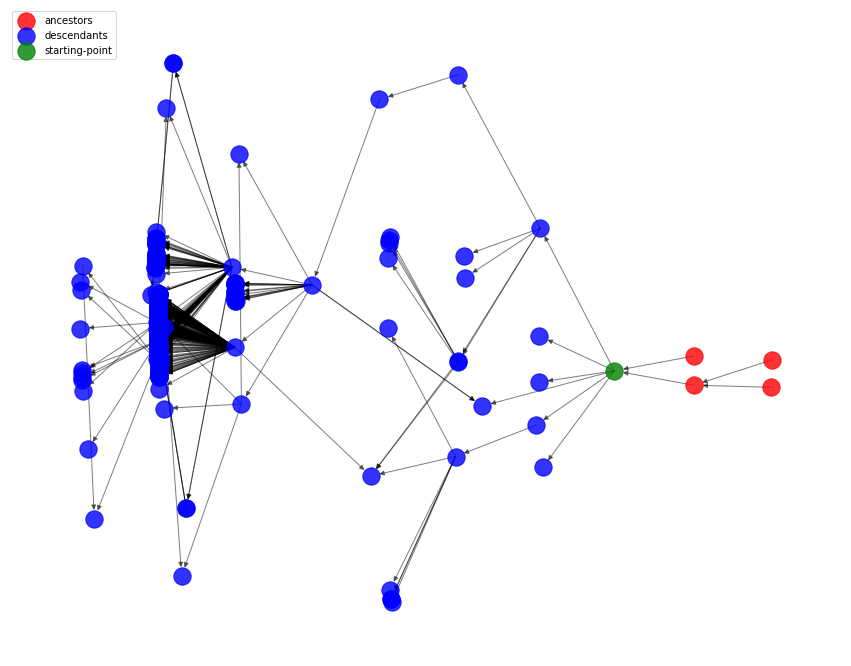

In [53]:
from matplotlib.pyplot import figure
# Why are there orphaned nodes? I forgot to add the OG node. Fixed.
# https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html
#fig = plt.Figure()
figure(figsize=(15, 12))
pos=nx.kamada_kawai_layout(H) # positions for all nodes

# nodes
nx.draw_networkx_nodes(H,pos,
                       nodelist=list(ancestors),
                       node_color='r',
                       #node_size=500,
                       label='ancestors',
                   alpha=0.8)
nx.draw_networkx_nodes(H,pos,
                       nodelist=list(descendants),
                       node_color='b',
                       #node_size=500,
                       label='descendants',
                   alpha=0.8)
nx.draw_networkx_nodes(H,pos,
                       nodelist=[selected_node],
                       node_color='g',
                       #node_size=500,
                       label='starting-point',
                   alpha=0.8)

# edges
nx.draw_networkx_edges(H,pos,width=1.0,alpha=0.5)

#plt.legend()
plt.legend(loc='upper left')
#fig.update_layout(legend=dict(x=-.1, y=1.2))
plt.axis('off')
plt.savefig("ancestor_descendants1.png") # save as png
plt.show() # display

## Node Type Display

In [57]:
file_nodes = []
for (p, d) in H.nodes(data=True):
    if d['_node_type']=='File':
        file_nodes.append(p)
len(file_nodes)

452

In [58]:
proc_nodes = []
for (p, d) in H.nodes(data=True):
    if d['_node_type']=='Process':
        proc_nodes.append(p)
len(proc_nodes)

35

In [59]:
ip_nodes = []
for (p, d) in H.nodes(data=True):
    if d['_node_type']=='IP Address':
        ip_nodes.append(p)
len(ip_nodes)

7

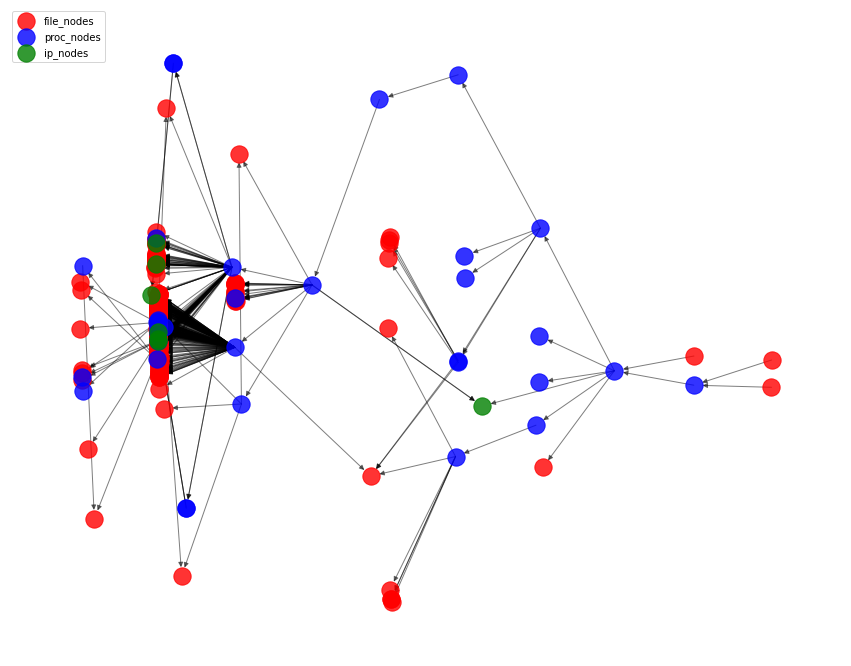

In [60]:
# Why are there orphaned nodes? I forgot to add the OG node. Fixed.
# https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html
#fig = plt.Figure()
figure(figsize=(15, 12))
pos=nx.kamada_kawai_layout(H) # positions for all nodes

# nodes
nx.draw_networkx_nodes(H,pos,
                       nodelist=file_nodes,
                       node_color='r',
                       #node_size=500,
                       label='file_nodes',
                   alpha=0.8)
nx.draw_networkx_nodes(H,pos,
                       nodelist=proc_nodes,
                       node_color='b',
                       #node_size=500,
                       label='proc_nodes',
                   alpha=0.8)
nx.draw_networkx_nodes(H,pos,
                       nodelist=ip_nodes,
                       node_color='g',
                       #node_size=500,
                       label='ip_nodes',
                   alpha=0.8)

# edges
nx.draw_networkx_edges(H,pos,width=1.0,alpha=0.5)

#plt.legend()
plt.legend(loc='upper left')
#fig.update_layout(legend=dict(x=-.1, y=1.2))
plt.axis('off')
plt.savefig("ancestor_descendants3.png") # save as png
plt.show() # display

## Bad Guid Analysis

In [65]:
graph_bad_guids = []
for (p, d) in H.nodes(data=True):
    if d['_node_type']=='Process':
        graph_bad_guids.append(d['properties']['process_guid'])
len(graph_bad_guids)

35

In [66]:
bad_guids = df_label.loc[(df_label['TP_Binary'] == True) & (df_label.ProcessGuid.notnull())]['ProcessGuid'].unique()
pd_all_guids = df_label.loc[(df_label.ProcessGuid.notnull()) & (df_label.CommandLine.notnull())][['ProcessGuid', 'Hostname', 'TP_Binary', 'CommandLine']]
pd_all_guids['true_label'] = False
pd_all_guids['true_label'].loc[pd_all_guids.ProcessGuid.isin(bad_guids)] = True

/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [67]:
pd_all_guids = pd_all_guids.drop(columns=['TP_Binary']).drop_duplicates()
pd_all_guids['graph_label'] = False
pd_all_guids['graph_label'].loc[pd_all_guids.ProcessGuid.isin(graph_bad_guids)] = True

In [68]:
# Super interesting. Graph finds some new legit malicious guids.
#    -> Graph is only on a single host. graph catches lateral movement process. Not the link between Process(Host1) -> IP -> Process(Host2)
#    -> Graph doesn't pick up the processes that spawn from the persistence mechanisms. 
#          -> No link between Process -> File -> Process? (startup folder file)
#          -> Check the graph with reg keys for the service persistence.
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):
    display(pd_all_guids[['ProcessGuid', 'Hostname', 'true_label', 'graph_label', 'CommandLine']].loc[((pd_all_guids.true_label==True) | (pd_all_guids.graph_label==True))].sort_values(by=['true_label', 'graph_label'], ascending=False))

ProcessGuid                Hostname  \
8974    {47ab858c-e342-5eac-d703-000000000400}  SCRANTON.dmevals.local   
14768   {47ab858c-e23d-5eac-c603-000000000400}  SCRANTON.dmevals.local   
39393   {47ab858c-e2f2-5eac-d203-000000000400}  SCRANTON.dmevals.local   
60037   {47ab858c-e1f8-5eac-bc03-000000000400}  SCRANTON.dmevals.local   
68686   {47ab858c-e2ac-5eac-cb03-000000000400}  SCRANTON.dmevals.local   
72642   {47ab858c-e18b-5eac-b103-000000000400}  SCRANTON.dmevals.local   
96356   {47ab858c-e1e4-5eac-b803-000000000400}  SCRANTON.dmevals.local   
113037  {47ab858c-e188-5eac-b003-000000000400}  SCRANTON.dmevals.local   
120642  {47ab858c-e144-5eac-ab03-000000000400}  SCRANTON.dmevals.local   
130522  {47ab858c-e305-5eac-d303-000000000400}  SCRANTON.dmevals.local   
139342  {47ab858c-e374-5eac-d803-000000000400}  SCRANTON.dmevals.local   
160348  {47ab858c-e14e-5eac-ac03-000000000400}  SCRANTON.dmevals.local   
169201  {47ab858c-e1e3-5eac-b603-000000000400}  SCRANTON.dmevals.local   
179251  {47ab858c-e13c-5eac-a903-000000000400}  SCRANTON.dmevals.local   
1334    {5aa8ec29-e655-5eac-8303-000000000400}    NASHUA.dmevals.local   
18627   {5aa8ec29-e5b8-5eac-7903-000000000400}    NASHUA.dmevals.local   
41375   {47ab858c-e442-5eac-ed03-000000000400}  SCRANTON.dmevals.local   
56194   {5aa8ec29-e5e4-5eac-7a03-000000000400}    NASHUA.dmevals.local   
80262   {5aa8ec29-e52e-5eac-6b03-000000000400}    NASHUA.dmevals.local   
83938   {47ab858c-e49f-5eac-f103-000000000400}  SCRANTON.dmevals.local   
85882   {5aa8ec29-e56d-5eac-6e03-000000000400}    NASHUA.dmevals.local   
95348   {5aa8ec29-e624-5eac-7f03-000000000400}    NASHUA.dmevals.local   
146429  {47ab858c-e49e-5eac-ef03-000000000400}  SCRANTON.dmevals.local   
149428  {47ab858c-e49f-5eac-f003-000000000400}  SCRANTON.dmevals.local   
149429  {5aa8ec29-e603-5eac-7b03-000000000400}    NASHUA.dmevals.local   
152248  {47ab858c-e6b2-5eac-4d00-000000000500}  SCRANTON.dmevals.local   
162243  {47ab858c-e442-5eac-ec03-000000000400}  SCRANTON.dmevals.local   
163244  {5aa8ec29-e618-5eac-7e03-000000000400}    NASHUA.dmevals.local   
175284  {5aa8ec29-e5b7-5eac-7703-000000000400}    NASHUA.dmevals.local   
180127  {5aa8ec29-e63e-5eac-8203-000000000400}    NASHUA.dmevals.local   
196722  {5aa8ec29-e4ec-5eac-6803-000000000400}    NASHUA.dmevals.local   
12975   {47ab858c-e374-5eac-d903-000000000400}  SCRANTON.dmevals.local   
26578   {47ab858c-e519-5eac-f403-000000000400}  SCRANTON.dmevals.local   
38237   {47ab858c-e1e3-5eac-b503-000000000400}  SCRANTON.dmevals.local   
63799   {47ab858c-e1e5-5eac-bb03-000000000400}  SCRANTON.dmevals.local   
73611   {47ab858c-e413-5eac-e903-000000000400}  SCRANTON.dmevals.local   
88067   {47ab858c-e188-5eac-af03-000000000400}  SCRANTON.dmevals.local   
104058  {47ab858c-e394-5eac-e303-000000000400}  SCRANTON.dmevals.local   
114981  {47ab858c-e3d3-5eac-e603-000000000400}  SCRANTON.dmevals.local   
115865  {47ab858c-e5a2-5eac-fb03-000000000400}  SCRANTON.dmevals.local   
117807  {47ab858c-e1e2-5eac-b303-000000000400}  SCRANTON.dmevals.local   
136222  {47ab858c-e558-5eac-f503-000000000400}  SCRANTON.dmevals.local   
144331  {47ab858c-e1e4-5eac-b903-000000000400}  SCRANTON.dmevals.local   
147546  {47ab858c-e394-5eac-e203-000000000400}  SCRANTON.dmevals.local   
151329  {47ab858c-e23d-5eac-c703-000000000400}  SCRANTON.dmevals.local   
154392  {47ab858c-e4d6-5eac-f303-000000000400}  SCRANTON.dmevals.local   
155466  {47ab858c-e1e5-5eac-ba03-000000000400}  SCRANTON.dmevals.local   
157536  {47ab858c-e413-5eac-e803-000000000400}  SCRANTON.dmevals.local   
164294  {47ab858c-e144-5eac-aa03-000000000400}  SCRANTON.dmevals.local   
169200  {47ab858c-e1e2-5eac-b203-000000000400}  SCRANTON.dmevals.local   
176379  {47ab858c-e3d3-5eac-e703-000000000400}  SCRANTON.dmevals.local   

        true_label  graph_label  \
8974          True         True   
14768         True         True   
39393         True         True   
60037         True         True   
68686      

## Rerun ancestor/decendent pipeline with NASHUA 'malicious' guid 
- {5aa8ec29-e618-5eac-7e03-000000000400}

In [72]:
for (p, d) in G.nodes(data=True):
    if 'process_guid' in d['properties'].keys():
        if '{5aa8ec29-e618-5eac-7e03-000000000400}' in d['properties']['process_guid']:
            selected_node = p
print(selected_node)

descendants = nx.descendants(G, selected_node) #Returns all nodes reachable from source in G.
print(len(descendants))

ancestors = nx.ancestors(G, selected_node)
print(len(ancestors))

suspected_malicious = list(ancestors) + list(descendants)
suspected_malicious.append(selected_node)
print(len(suspected_malicious))

H = G.subgraph(suspected_malicious)

-1674479079497311076
3
8
12


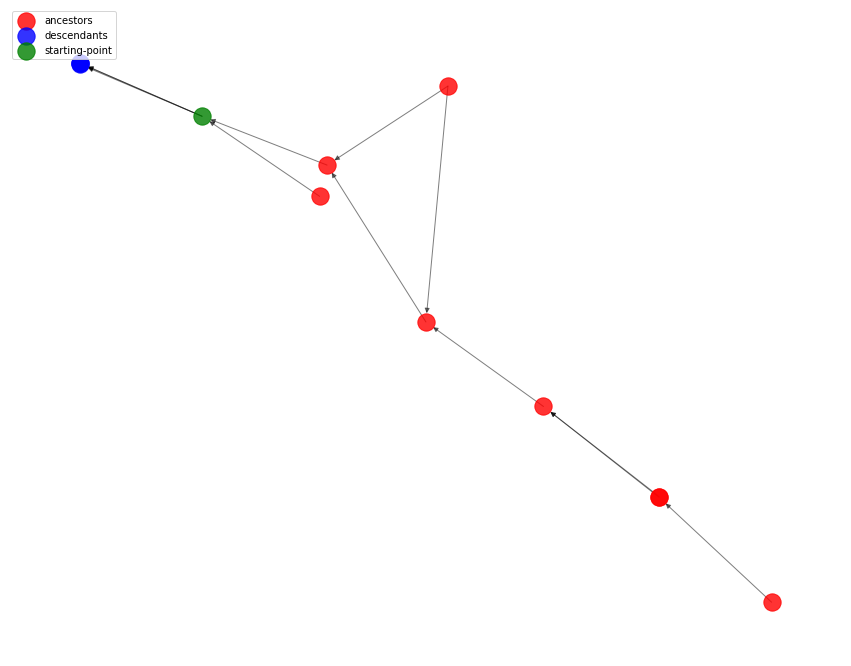

In [73]:
from matplotlib.pyplot import figure
# Why are there orphaned nodes? I forgot to add the OG node. Fixed.
# https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html
#fig = plt.Figure()
figure(figsize=(15, 12))
pos=nx.kamada_kawai_layout(H) # positions for all nodes

# nodes
nx.draw_networkx_nodes(H,pos,
                       nodelist=list(ancestors),
                       node_color='r',
                       #node_size=500,
                       label='ancestors',
                   alpha=0.8)
nx.draw_networkx_nodes(H,pos,
                       nodelist=list(descendants),
                       node_color='b',
                       #node_size=500,
                       label='descendants',
                   alpha=0.8)
nx.draw_networkx_nodes(H,pos,
                       nodelist=[selected_node],
                       node_color='g',
                       #node_size=500,
                       label='starting-point',
                   alpha=0.8)

# edges
nx.draw_networkx_edges(H,pos,width=1.0,alpha=0.5)

#plt.legend()
plt.legend(loc='upper left')
#fig.update_layout(legend=dict(x=-.1, y=1.2))
plt.axis('off')
plt.savefig("ancestor_descendants2.png") # save as png
plt.show() # display

In [ ]:
# So the ancestor descendent method his highly specific if the origin process is further down the causal chain. 
# Ideally, I want the seniormost ancestor process from the origin.

### Recurse Ancestor Chain for Root Process Node.

In [91]:
for (p, d) in G.nodes(data=True):
    if 'process_guid' in d['properties'].keys():
        if '{5aa8ec29-e618-5eac-7e03-000000000400}' in d['properties']['process_guid']:
            selected_node = p
print(selected_node)

ancestors = nx.ancestors(G, selected_node)
print(len(ancestors))
for i in nx.ancestors(G, selected_node):
    if G.node[i]['_node_class'] == 'SysMonProc':
        ancestors = nx.ancestors(G, i)
        print(len(ancestors))
        if len(ancestors) <= 2:
            print('root-est process')

ancestors = nx.ancestors(G, selected_node)
print(G.node[list(ancestors)[-2]]['properties']['process_guid'])
df_label.loc[(df_label.EventID == 1) & (df_label.ProcessGuid==(G.node[list(ancestors)[-2]]['properties']['process_guid']))]

-1674479079497311076
8
6
5
3
1
root-est process
{5aa8ec29-e5b7-5eac-7603-000000000400}


@timestamp  @version Category  \
154393  2020-05-02T03:15:04.525Z       1.0      NaN   

                                     Channel  EventID    EventReceivedTime  \
154393  Microsoft-Windows-Sysmon/Operational      1.0  2020-05-01 23:15:04   

                  EventTime EventType  ExecutionProcessID  \
154393  2020-05-01 23:15:03      INFO              3428.0   

                    Hostname IpAddress IpPort      Keywords  \
154393  NASHUA.dmevals.local       NaN    NaN -9.223372e+18   

                                     LogonGuid  \
154393  {5aa8ec29-cad7-5eac-e703-000000000000}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Message  \
154393  Process Create:\r\nRuleName: -\r\nUtcTime: 2020-05-02 03:15:03.704\r\nProcessGuid: {5aa8ec29-e5b7-5eac-7603-000000000400}\r\nProcessId: 1624\r\nImage: C:\Windows\PSEXESVC.exe\r\nFileVersion: 2.2\r\nDescription: PsExec Service\r\nProduct: Sysinternals PsExec\r\nCompany: Sysinternals\r\nOriginalFileName: psexesvc.exe\r\nCommandLine: C:\windows\PSEXESVC.exe\r\nCurrentDirectory: C:\windows\system32\\r\nUser: NT AUTHORITY\SYSTEM\r\nLogonGuid: {5aa8ec29-cad7-5eac-e703-000000000000}\r\nLogonId: 0x3...   

       Opcode  OpcodeValue                            ProviderGuid  \
154393    NaN          0.0  {5770385F-C22A-43E0-BF4C-06F5698FFBD9}   

        RecordNumber ServiceName ServiceSid Severity  SeverityValue  \
154393      351259.0         NaN        NaN     INFO            2.0   

       SourceModuleName SourceModuleType                SourceName Status  \
154393         eventlog    im_msvistalog  Microsoft-Windows-Sysmon    NaN   

       TargetDomainName TargetUserName  Task  ThreadID TicketEncryptionType  \
154393              NaN            NaN   1.0    4224.0                  NaN   

       TicketOptions  TransmittedServices  Version                       host  \
154393           NaN                  NaN      5.0  wec.internal.cloudapp.net   

           port             tags TP_Label Action ActivityID CalloutKey  \
154393  60737.0  [mordorDataset]        0    NaN        NaN        NaN   

       CalloutName ChangeType Conditions  FilterId FilterKey FilterName  \
154393         NaN        NaN        NaN       NaN       NaN        NaN   

       FilterType  LayerId LayerKey LayerName ProcessId ProviderKey  \
154393        NaN      NaN      NaN       NaN      1624         NaN   

       ProviderName UserName UserSid  Weight AccessList AccessMask  \
154393          NaN      NaN     NaN     NaN        NaN        NaN   

       AccessReason HandleId ObjectName ObjectServer ObjectType PrivilegeList  \
154393          NaN      NaN        NaN          NaN        NaN           NaN   

       ProcessName  ResourceAttributes  RestrictedSidCount SubjectDomainName  \
154393         NaN                 NaN                 NaN               NaN   

       SubjectLogonId SubjectUserName SubjectUserSid TransactionId  \
154393            NaN             NaN            NaN           NaN   

       ShareLocalPath ShareName RelativeTargetName              CommandLine  \
154393            NaN       NaN                NaN  C:\windows\PSEXESVC.exe   

       MandatoryLabel NewProcessId NewProcessName ParentProcessName  \
154393            NaN          NaN            NaN               NaN   

       TargetLogonId TargetUserSid TokenElevationType Service  \
154393           NaN           NaN                NaN     NaN   

       DisabledPrivilegeList EnabledPrivilegeList CallerProcessId  \
154393                   NaN                  NaN             NaN   

In [ ]:
descendants = nx.descendants(G, selected_node) #Returns all nodes reachable from source in G.
print(len(descendants))

ancestors = nx.ancestors(G, selected_node)
print(len(ancestors))

suspected_malicious = list(ancestors) + list(descendants)
suspected_malicious.append(selected_node)
print(len(suspected_malicious))


In [ ]:
#X.shape

In [ ]:
# remove null only columns
#X = X[X.columns[~X.isnull().all()]]

In [ ]:
#X.shape

## New Sysmon Transformer?

In [80]:
from beagle.backends import NetworkX
from beagle.transformers import SysmonTransformer

datasource = JSONData(df_label.loc[(df_label['EventID']==11)].to_dict('records'))
transformer = SysmonTransformer(datasource=datasource)

2020-07-01T04:19:31 | beagle.transformers.sysmon_transformer.__init__:15 | INFO | Created Sysmon Transformer.


In [81]:
nodes = transformer.run()

2020-07-01T04:19:32 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-01T04:19:32 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-01T04:19:32 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-01T04:19:32 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-01T04:19:32 | beagle.transformers.base_transformer.run:111 | INFO | Finished processing of events, created 4947 nodes.
2020-07-01T04:19:32 | beagle.transformers.base_transformer.run:114 | WARNING | Parsing finished with errors.


In [82]:
backend = NetworkX(nodes=nodes)
G = backend.graph()

2020-07-01T04:19:36 | beagle.backends.networkx.__init__:56 | INFO | Initialized NetworkX Backend
2020-07-01T04:19:36 | beagle.backends.networkx.graph:73 | INFO | Beginning graph generation.
2020-07-01T04:19:37 | beagle.backends.networkx.graph:83 | INFO | Completed graph generation.
2020-07-01T04:19:37 | beagle.backends.networkx.graph:84 | INFO | Graph contains 1396 nodes and 1750 edges.


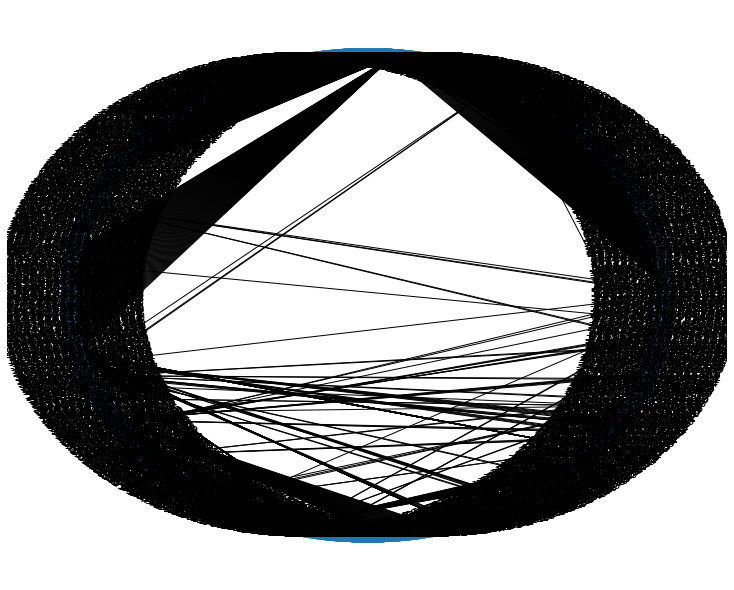

In [83]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

## Trying a Mix of EventID

In [24]:
from beagle.backends import NetworkX

NX = NetworkX.from_datasources(
    datasources=[
        JSONData(df_label.loc[(df_label['EventID']==1)].head(100).to_dict('records')),
        JSONData(df_label.loc[(df_label['EventID']==3)].head(100).to_dict('records')),
        JSONData(df_label.loc[(df_label['EventID']==11)].head(100).to_dict('records')),
    ]
)
G = NX.graph()

2020-07-01T21:23:22 | beagle.transformers.sysmon_transformer.__init__:15 | INFO | Created Sysmon Transformer.
2020-07-01T21:23:22 | beagle.transformers.base_transformer.run:111 | INFO | Finished processing of events, created 400 nodes.
2020-07-01T21:23:22 | beagle.transformers.sysmon_transformer.__init__:15 | INFO | Created Sysmon Transformer.
2020-07-01T21:23:22 | beagle.transformers.base_transformer.run:111 | INFO | Finished processing of events, created 300 nodes.
2020-07-01T21:23:22 | beagle.transformers.sysmon_transformer.__init__:15 | INFO | Created Sysmon Transformer.
2020-07-01T21:23:22 | beagle.transformers.base_transformer.run:111 | INFO | Finished processing of events, created 300 nodes.
2020-07-01T21:23:22 | beagle.backends.networkx.__init__:56 | INFO | Initialized NetworkX Backend
2020-07-01T21:23:22 | beagle.backends.networkx.graph:73 | INFO | Beginning graph generation.
2020-07-01T21:23:22 | beagle.backends.networkx.graph:83 | INFO | Completed graph generation.
2020-07-0

In [31]:
G

/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


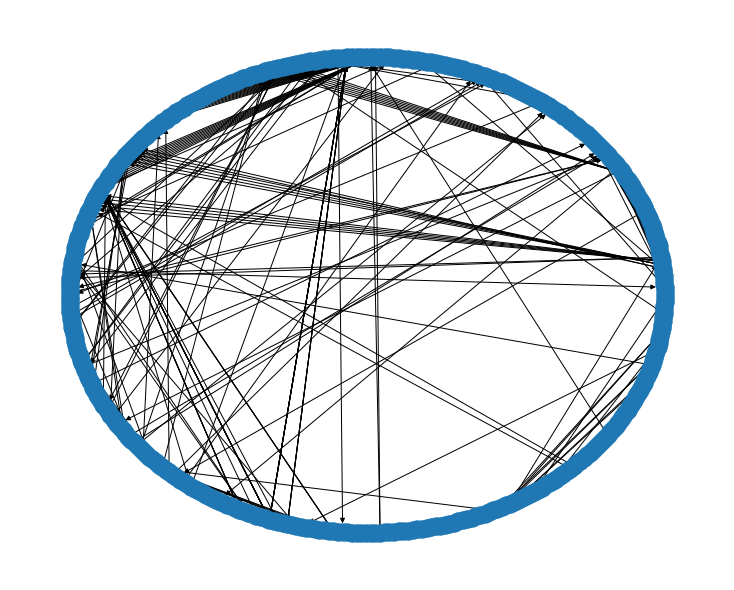

In [25]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=False)

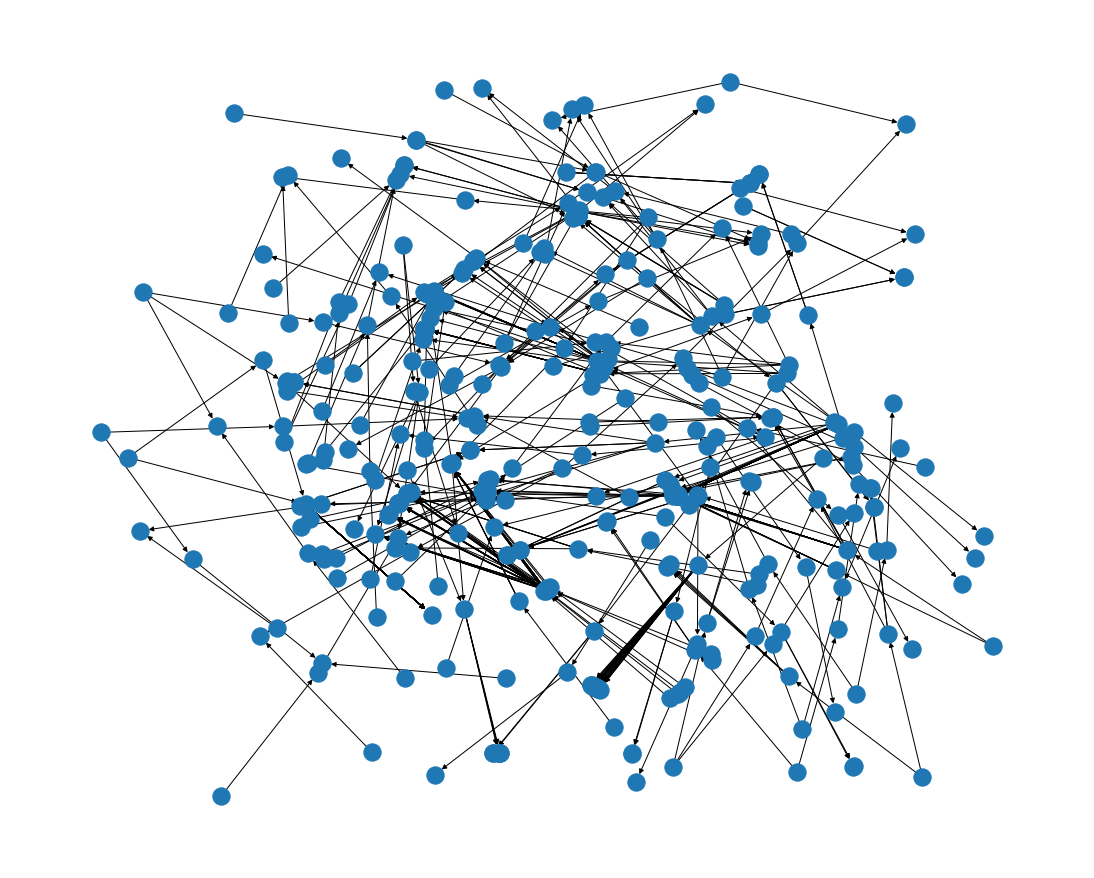

In [26]:
from matplotlib.pyplot import figure
figure(figsize=(15, 12))
nx.draw_kamada_kawai(G, with_labels=False)

/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/networkx/drawing/layout.py:923: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


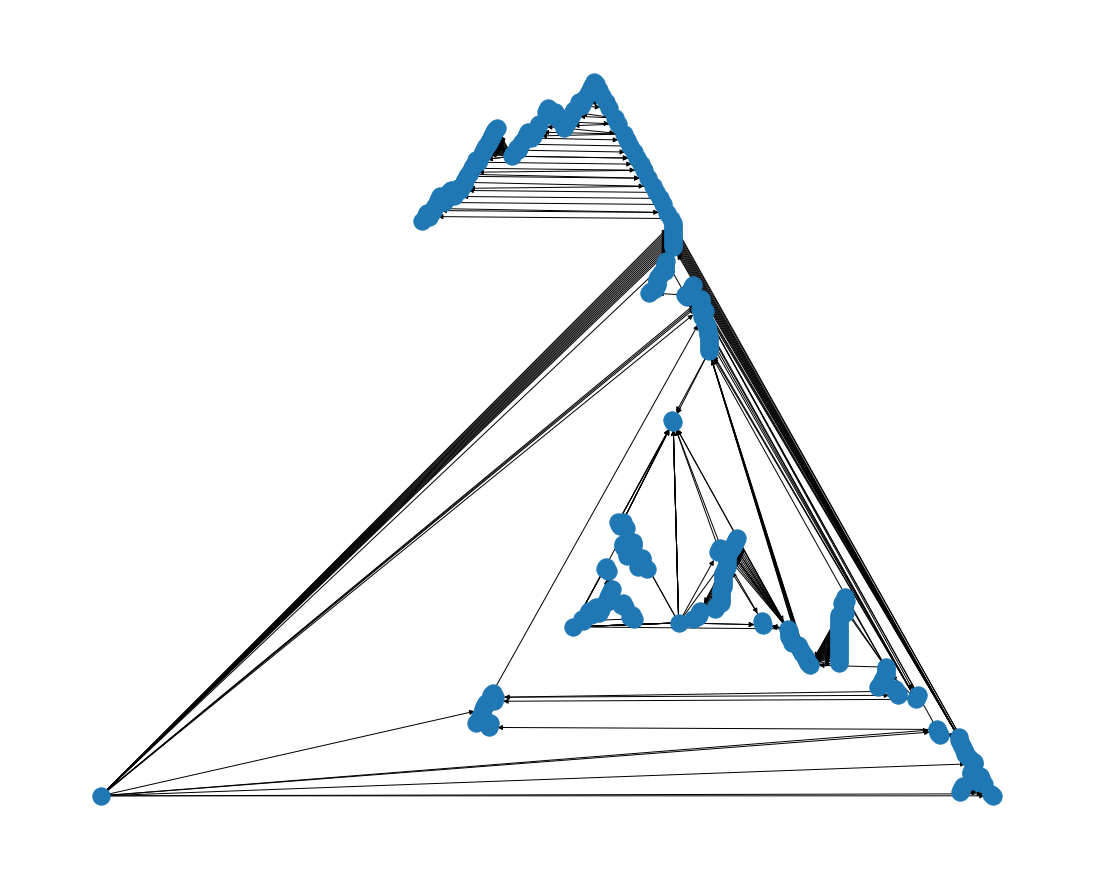

In [27]:
from matplotlib.pyplot import figure
figure(figsize=(15, 12))
nx.draw_planar(G, with_labels=False)

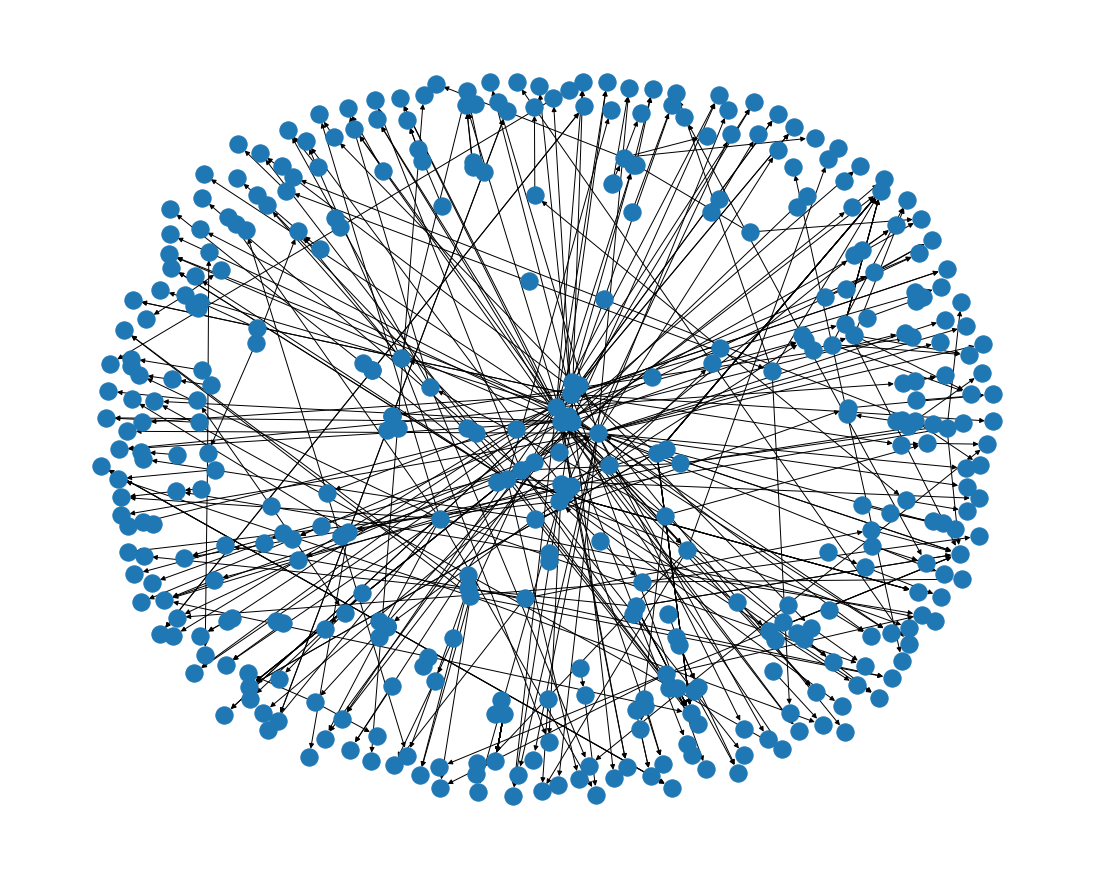

In [28]:
from matplotlib.pyplot import figure
figure(figsize=(15, 12))
nx.draw_spring(G, with_labels=False)

### Checking Directed

In [32]:
nx.is_directed_acyclic_graph(G)

True

In [33]:
nx.is_aperiodic(G)

False

In [53]:
list(G.nodes(data=True))

[(-4169645887721890129,
  {'data': (<SysMonProc> process_guid={47ab858c-cadc-5eac-2200-000000000400})}),
 (-6092513690302864310,
  {'data': (<SysMonProc> process_guid={47ab858c-e589-5eac-f803-000000000400})}),
 (-784379201303259684,
  {'data': (<SysMonProc> process_guid={47ab858c-e296-5eac-c803-000000000400})}),
 (-8177541406566334932,
  {'data': (<File> host=SCRANTON.dmevals.local full_path=C:\Windows\System32\svchost.exe)}),
 (-3684500056444928751,
  {'data': (<SysMonProc> process_guid={47ab858c-e6af-5eac-2100-000000000500})}),
 (8266788693158178458,
  {'data': (<SysMonProc> process_guid={47ab858c-e715-5eac-cd00-000000000500})}),
 (8421455767405970924,
  {'data': (<SysMonProc> process_guid={47ab858c-e72c-5eac-ec00-000000000500})}),
 (-786881400265714481,
  {'data': (<SysMonProc> process_guid={47ab858c-e6af-5eac-1800-000000000500})}),
 (-385685397828928663,
  {'data': (<SysMonProc> process_guid={47ab858c-e6ae-5eac-1000-000000000500})}),
 (6768055936210613122,
  {'data': (<SysMonProc> 

In [71]:
nodesAt5 = [y for x,y in G.nodes(data=True) if y['data']=="(<SysMonProc> process_guid={47ab858c-cadc-5eac-2200-000000000400})"]

In [72]:
nodesAt5

[]

In [81]:
dict(G.nodes(data=True))

{-4169645887721890129: {'data': (<SysMonProc> process_guid={47ab858c-cadc-5eac-2200-000000000400})},
 -6092513690302864310: {'data': (<SysMonProc> process_guid={47ab858c-e589-5eac-f803-000000000400})},
 -784379201303259684: {'data': (<SysMonProc> process_guid={47ab858c-e296-5eac-c803-000000000400})},
 -8177541406566334932: {'data': (<File> host=SCRANTON.dmevals.local full_path=C:\Windows\System32\svchost.exe)},
 -3684500056444928751: {'data': (<SysMonProc> process_guid={47ab858c-e6af-5eac-2100-000000000500})},
 8266788693158178458: {'data': (<SysMonProc> process_guid={47ab858c-e715-5eac-cd00-000000000500})},
 8421455767405970924: {'data': (<SysMonProc> process_guid={47ab858c-e72c-5eac-ec00-000000000500})},
 -786881400265714481: {'data': (<SysMonProc> process_guid={47ab858c-e6af-5eac-1800-000000000500})},
 -385685397828928663: {'data': (<SysMonProc> process_guid={47ab858c-e6ae-5eac-1000-000000000500})},
 6768055936210613122: {'data': (<SysMonProc> process_guid={47ab858c-cada-5eac-1000-0

In [96]:
nodesAt5 = []
for (p, d) in G.nodes(data=True):
    nodesAt5.append(d['data'])
    if 'process_guid={47ab858c-cadc-5eac-2200-000000000400}' in d['data']:
        print("found1!")

TypeError: argument of type 'SysMonProc' is not iterable

In [94]:
nodesAt5[0]

(<SysMonProc> process_guid={47ab858c-cadc-5eac-2200-000000000400})

In [97]:
list(G.edges.data())

[(-4169645887721890129,
  -6092513690302864310,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:14:17.672'},
   'edge_name': 'Launched'}),
 (-4169645887721890129,
  -784379201303259684,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:01:42.046'},
   'edge_name': 'Launched'}),
 (-784379201303259684,
  12184893643331365,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:01:42.054'},
   'edge_name': 'Launched'}),
 (-8177541406566334932,
  -4169645887721890129,
  {'key': 'File Of', 'data': None, 'edge_name': 'File Of'}),
 (-8177541406566334932,
  -3684500056444928751,
  {'key': 'File Of', 'data': None, 'edge_name': 'File Of'}),
 (-8177541406566334932,
  8266788693158178458,
  {'key': 'File Of', 'data': None, 'edge_name': 'File Of'}),
 (-8177541406566334932,
  8421455767405970924,
  {'key': 'File Of', 'data': None, 'edge_name': 'File Of'}),
 (-8177541406566334932,
  -786881400265714481,
  {'key': 'File Of', 'data': None, 'edge_name': 'File Of'}),
 (-8

In [102]:
selected_nodes = [n for n,v in G.nodes(data=True) if '47ab858c-cadc-5eac-2200-000000000400' in str(v['data']) ]
print (selected_nodes)

[-4169645887721890129]


In [104]:
selected_nodes = [n for n,v in G.nodes(data=True) if '47ab858c-cadc-5eac-2200-000000000400' in str(v['data']) ]
print (selected_nodes)

[-4169645887721890129]


In [119]:
nx.descendants(G, -4169645887721890129) #Returns all nodes reachable from source in G.

{-6092513690302864310, -784379201303259684, 12184893643331365}

In [114]:
G.nodes().keys()

KeysView(NodeView((-4169645887721890129, -6092513690302864310, -784379201303259684, -8177541406566334932, -3684500056444928751, 8266788693158178458, 8421455767405970924, -786881400265714481, -385685397828928663, 6768055936210613122, -6677464587931586682, -3855628969170068163, 8735618686301349374, -8436954300942875992, 7352189873815724782, 6452840845502345908, 2674932195504773122, -5239618055833662236, 4740786494694815366, -7872559103723530652, -38620286950103666, 6933875207699792727, 1681223080335425043, 4040907390904251748, -266122441419447452, -5454717607702915780, 5537061262640782753, -3397298256972525839, -2507738208943767357, 8985261523482336044, 8102475987704129995, -6467014223552008087, 7622397568111723870, 6417570620648708350, 8722208060735597018, -7673921073999258189, -6632995216591096524, -737465781888697570, -8954691125388113077, 65293343503661027, -967592686645100112, -4354275745908014031, -81157196201773537, 7014308878073851735, 3533410382381655075, -1002300282668070329, -

In [118]:
# Int type nodes
G.nodes[-4169645887721890129]

{'data': (<SysMonProc> process_guid={47ab858c-cadc-5eac-2200-000000000400})}

In [120]:
nx.ancestors(G, -4169645887721890129) #Returns all nodes reachable from source in G.

{-8177541406566334932}

### Going Undirected

In [121]:
G = G.to_undirected()
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[287, 17, 17, 6, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3]

In [122]:
graphs = list(nx.connected_component_subgraphs(G))

In [123]:
graphs

/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


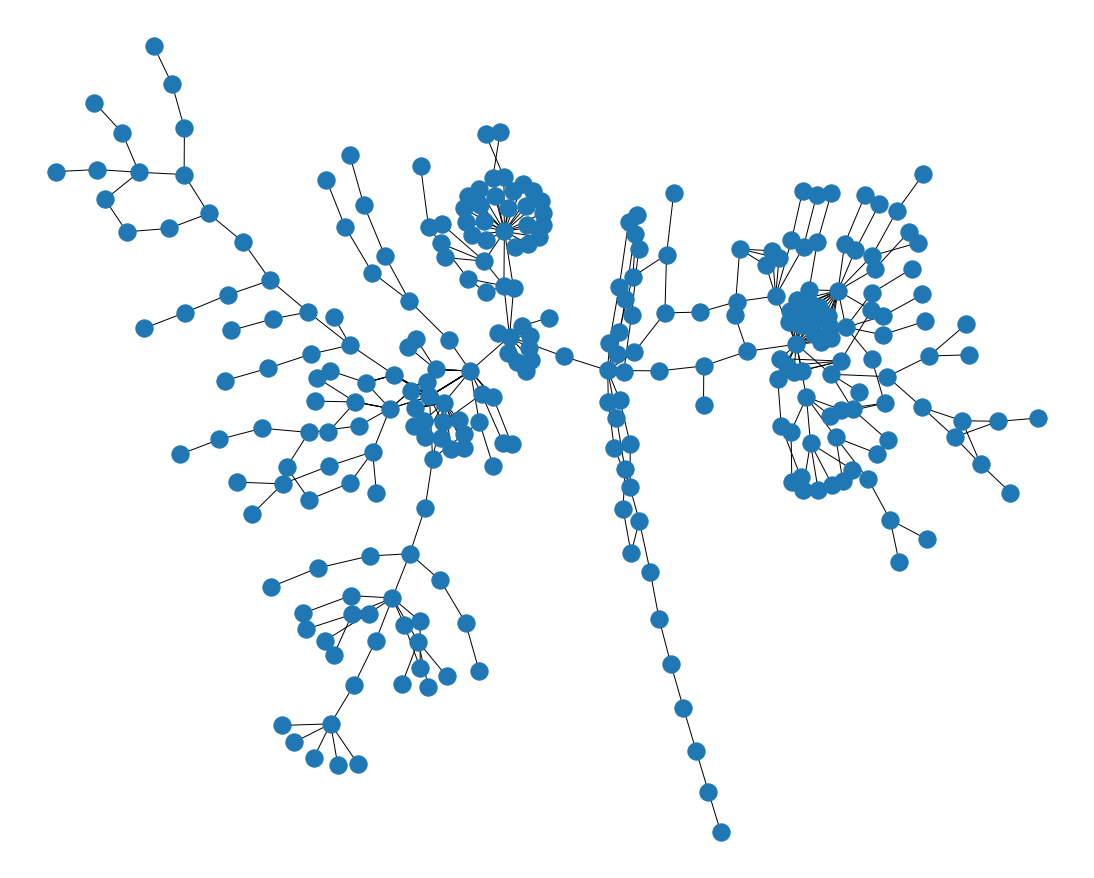

In [124]:
from matplotlib.pyplot import figure
figure(figsize=(15, 12))
nx.draw_kamada_kawai(graphs[0], with_labels=False)

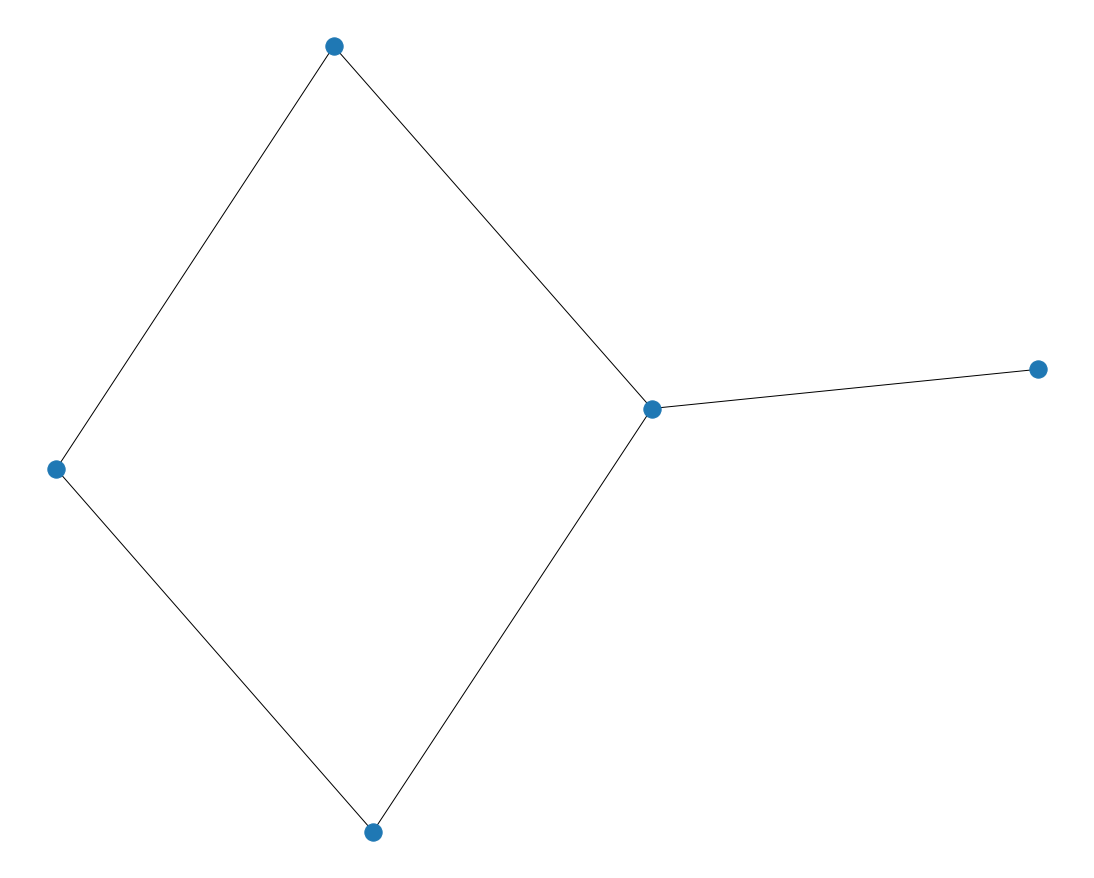

In [125]:
from matplotlib.pyplot import figure
figure(figsize=(15, 12))
nx.draw_kamada_kawai(graphs[1], with_labels=False)

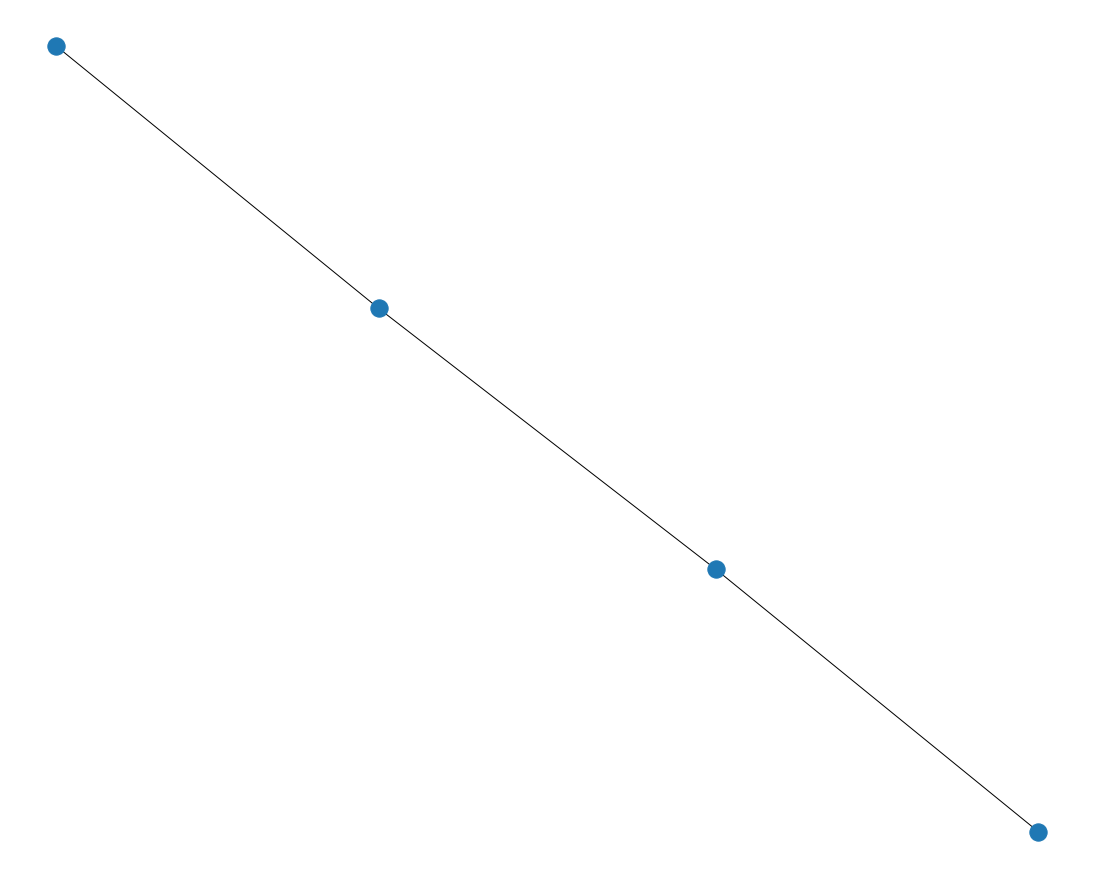

In [126]:
from matplotlib.pyplot import figure
figure(figsize=(15, 12))
nx.draw_kamada_kawai(graphs[2], with_labels=False)

## Replay Mix of EventIDs on Full Dataset

In [127]:
from beagle.backends import NetworkX

NX = NetworkX.from_datasources(
    datasources=[
        JSONData(df_label.loc[(df_label['EventID']==1)].to_dict('records')),
        JSONData(df_label.loc[(df_label['EventID']==3)].to_dict('records')),
        JSONData(df_label.loc[(df_label['EventID']==11)].to_dict('records')),
    ]
)
G = NX.graph()

2020-07-01T23:05:09 | beagle.transformers.sysmon_transformer.__init__:15 | INFO | Created Sysmon Transformer.
2020-07-01T23:05:09 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-01T23:05:09 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-01T23:05:09 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-01T23:05:09 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-01T23:05:09 | beagle.transformers.base_transformer.run:111 | INFO | Finished processing of events, created 1784 nodes.
2020-07-01T23:05:09 | beagle.transformers.base_transfor

In [128]:
nx.is_directed_acyclic_graph(G)

True

In [231]:
G.nodes(data=True)

NodeDataView({-4169645887721890129: {'data': (<SysMonProc> process_guid={47ab858c-cadc-5eac-2200-000000000400})}, -6092513690302864310: {'data': (<SysMonProc> process_guid={47ab858c-e589-5eac-f803-000000000400})}, -784379201303259684: {'data': (<SysMonProc> process_guid={47ab858c-e296-5eac-c803-000000000400})}, -4774047874920206422: {'data': (<SysMonProc> process_guid={47ab858c-e2d4-5eac-cd03-000000000400})}, -2187950546500015549: {'data': (<SysMonProc> process_guid={47ab858c-e37a-5eac-e003-000000000400})}, 1466980898552841342: {'data': (<SysMonProc> process_guid={47ab858c-e2d4-5eac-cc03-000000000400})}, -8323192830281313097: {'data': (<SysMonProc> process_guid={47ab858c-e68a-5eac-0304-000000000400})}, -8177541406566334932: {'data': (<File> host=SCRANTON.dmevals.local full_path=C:\Windows\System32\svchost.exe)}, -3684500056444928751: {'data': (<SysMonProc> process_guid={47ab858c-e6af-5eac-2100-000000000500})}, 8266788693158178458: {'data': (<SysMonProc> process_guid={47ab858c-e715-5eac

In [230]:
list(G.edges(data=True))

[(-4169645887721890129,
  -6092513690302864310,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:14:17.672'},
   'edge_name': 'Launched'}),
 (-4169645887721890129,
  -784379201303259684,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:01:42.046'},
   'edge_name': 'Launched'}),
 (-4169645887721890129,
  -4774047874920206422,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:02:44.901'},
   'edge_name': 'Launched'}),
 (-4169645887721890129,
  -2187950546500015549,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:05:30.108'},
   'edge_name': 'Launched'}),
 (-4169645887721890129,
  1466980898552841342,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:02:44.870'},
   'edge_name': 'Launched'}),
 (-4169645887721890129,
  -8323192830281313097,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:18:34.907'},
   'edge_name': 'Launched'}),
 (-784379201303259684,
  12184893643331365,
  {'key': 'Launched',
   'data': {'times

### ID Malicious GUID for ancestor/descendants discovery

In [129]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_label.loc[(df_label['TP_Binary'] == True)].groupby(['ProcessGuid', 'TP_Label', 'TP_Binary'])['time_stamp', 'EventID'].count())

/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


time_stamp  \
ProcessGuid                            TP_Label                                                              TP_Binary               
{47ab858c-cad9-5eac-0b00-000000000400} 0, 5.A.1. New Service                                                 True                7   
{47ab858c-cc06-5eac-9402-000000000400} 0, 1.A.1. User Execution                                              True                1   
{47ab858c-e13c-5eac-a903-000000000400} 0, 1.A.1. User Execution, 1.A.2. Masquerading                         True                1   
                                       0, 1.A.3. Uncommonly Used Port                                        True                1   
                                       0, 1.A.4. Standard Cryptographic Protocol                             True                1   
                                       0, 3.A.1. Remote File Copy                                            True                1   
{47ab858c-e144-5eac-ab03-000000000400} 0, 1.B.1. Command-Line Interface, 2.A.1. File and Directory Discovery True                1   
{47ab858c-e14e-5eac-ac03-000000000400} 0, 1.B.2. PowerShell                                                  True                1   
                                       0, 2.A.5. Data Staged, 4.A.1. Remote File Copy                        True                1   
{47ab858c-e188-5eac-b003-000000000400} 0, 1.B.1. Command-Line Interface                                      True                1   
{47ab858c-e18b-5eac-b103-000000000400} 0, 1.B.2. PowerShell                                                  True                1   
                                       0, 3.B.1. Component Object Model Hijacking                            True                1   
{47ab858c-e1e3-5eac-b603-000000000400} 0, 3.B.2. Bypass User Account Control                                 True                1   
{47ab858c-e1e4-5eac-b803-000000000400} 0, 3.B.2. Bypass User Account Control                                 True                1   
                                       0, 3.B.3. Commonly Used Port                                          True                2   
{47ab858c-e1f8-5eac-bc03-000000000400} 0, 1.B.2. PowerShell                                                  True                1   
                                       0, 3.C.1. Modify Registry                                             True                1   
{47ab858c-e23d-5eac-c603-000000000400} 0, 4.A.2. PowerShell                                                  True                1   
                                       0, 4.C.10. Execution through API, 4.C.12. Execution through API       True                1   
                                       0, 5.B.1. Registry Run Keys / Startup Folder                          True                1   
                                       0, 6.B.1. Private Keys                                                True                1   
{47ab858c-e2ac-5eac-cb03-000000000400} 0, 4.B.2. File Deletion                                               True                6   
{47ab858c-e2f2-5eac-d203-000000000400} 0, 4.B.3. File Deletion                                               True                6   
{47ab858c-e305-5eac-d303-000000000400} 0, 4.B.4. File Deletion                                               True                6   
{47ab858c-e342-5eac-d703-000000000400} 0, 6.A.3. Masquerading, 6.A.3. Masquerading                           True                1   
{47ab858c-e374-5eac-d803-000000000400} 0, 4.A.2. PowerShell                                                  True                1   
                                       0, 7.A.1. Screen Capture                                              True                1   
                                       0, 7.B.2. Data Compressed                                             True                1   
                                       0, 8.A.1. Remote System Discovery                            

In [131]:
selected_node = [n for n,v in G.nodes(data=True) if '{47ab858c-e13c-5eac-a903-000000000400}' in str(v['data']) ]
print (selected_node)

[-8558672399516925444]


In [137]:
descendants = nx.descendants(G, -8558672399516925444) #Returns all nodes reachable from source in G.
len(descendants)

489

In [138]:
ancestors = nx.ancestors(G, -8558672399516925444)
len(ancestors)

4

In [144]:
suspected_malicious = list(ancestors) + list(descendants) + list(selected_node)

In [145]:
len(suspected_malicious)

494

In [146]:
H = G.subgraph(suspected_malicious)

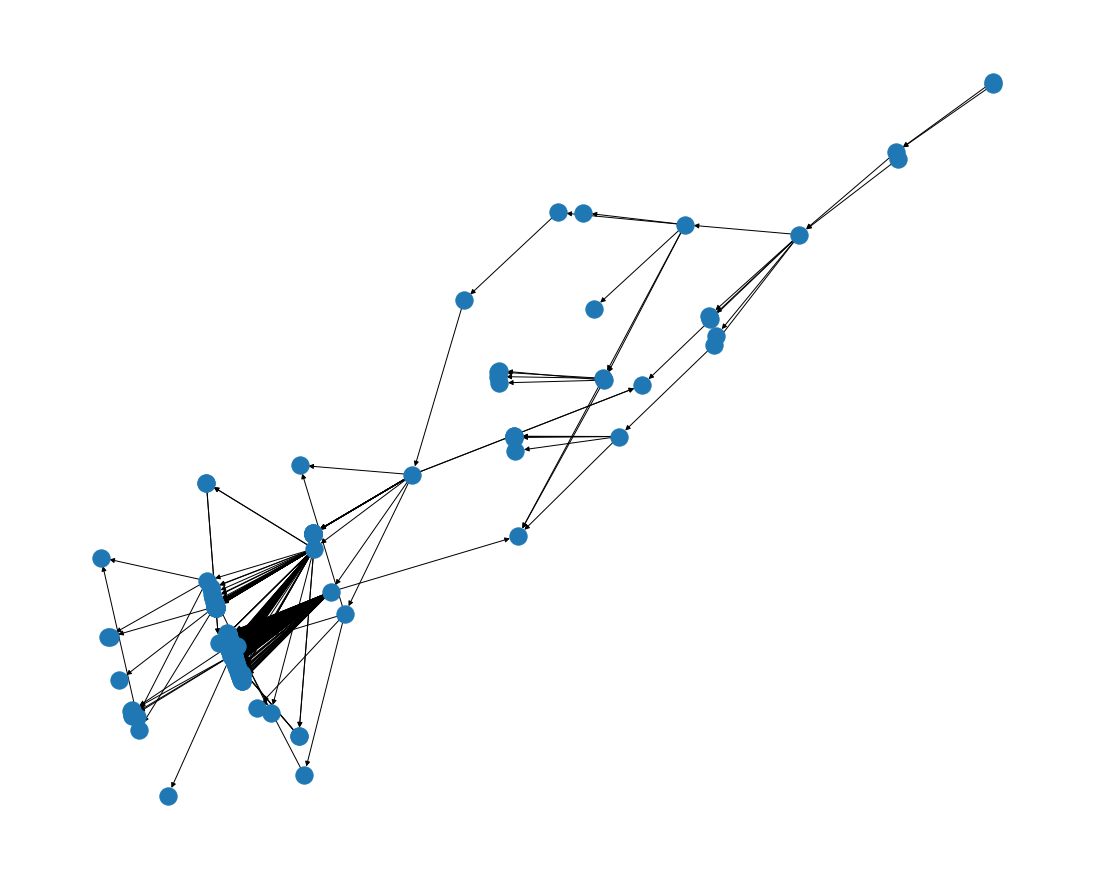

In [147]:
from matplotlib.pyplot import figure
figure(figsize=(15, 12))
nx.draw_kamada_kawai(H, with_labels=False)

### Color graph by Origin, Ancestors, Descendents type

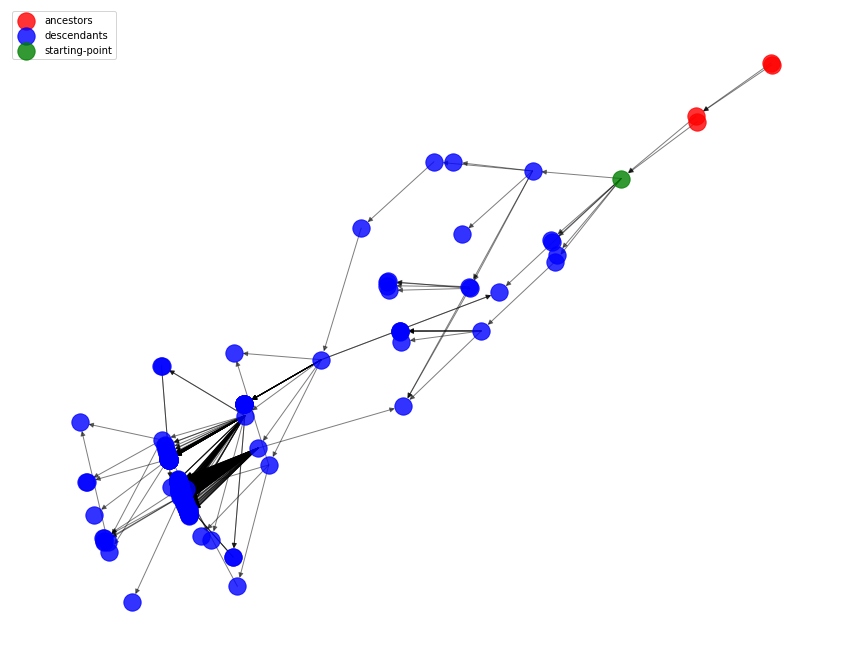

In [161]:
# Why are there orphaned nodes? I forgot to add the OG node. Fixed.
# https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html
#fig = plt.Figure()
figure(figsize=(15, 12))
pos=nx.kamada_kawai_layout(H) # positions for all nodes

# nodes
nx.draw_networkx_nodes(H,pos,
                       nodelist=ancestors,
                       node_color='r',
                       #node_size=500,
                       label='ancestors',
                   alpha=0.8)
nx.draw_networkx_nodes(H,pos,
                       nodelist=descendants,
                       node_color='b',
                       #node_size=500,
                       label='descendants',
                   alpha=0.8)
nx.draw_networkx_nodes(H,pos,
                       nodelist=selected_node,
                       node_color='g',
                       #node_size=500,
                       label='starting-point',
                   alpha=0.8)

# edges
nx.draw_networkx_edges(H,pos,width=1.0,alpha=0.5)

#plt.legend()
plt.legend(loc='upper left')
#fig.update_layout(legend=dict(x=-.1, y=1.2))
plt.axis('off')
plt.savefig("ancestor_descendants1.png") # save as png
plt.show() # display

### Color graph by node type

In [167]:
file_nodes = [n for n,v in H.nodes(data=True) if 'File' in str(v['data']) ]
len(file_nodes)

452

In [168]:
proc_nodes = [n for n,v in H.nodes(data=True) if 'SysMonProc' in str(v['data']) ]
len(proc_nodes)

35

In [169]:
ip_nodes = [n for n,v in H.nodes(data=True) if 'ip_address' in str(v['data']) ]
len(ip_nodes)

7

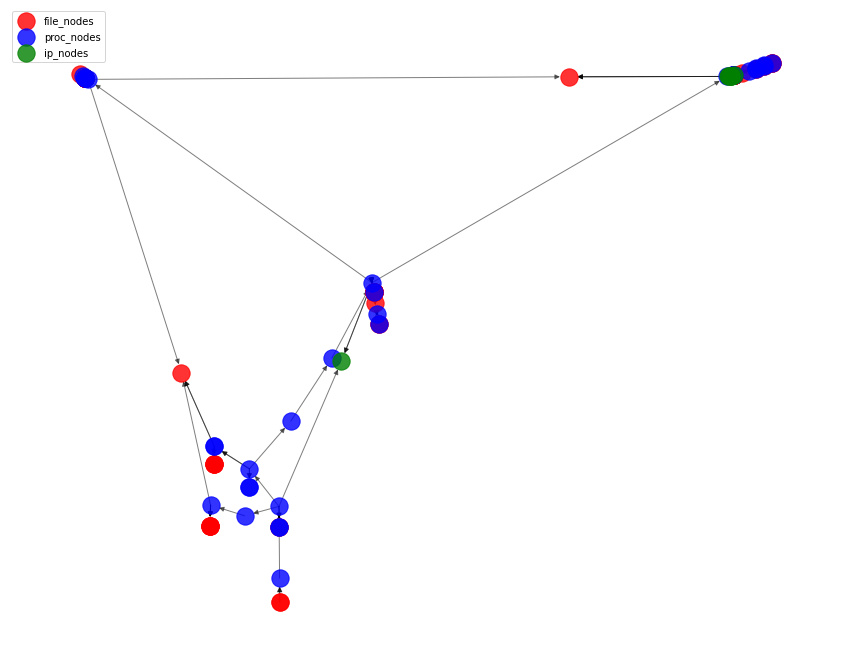

In [174]:
# Why are there orphaned nodes? I forgot to add the OG node. Fixed.
# https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html
#fig = plt.Figure()
figure(figsize=(15, 12))
pos=nx.spectral_layout(H) # positions for all nodes

# nodes
nx.draw_networkx_nodes(H,pos,
                       nodelist=file_nodes,
                       node_color='r',
                       #node_size=500,
                       label='file_nodes',
                   alpha=0.8)
nx.draw_networkx_nodes(H,pos,
                       nodelist=proc_nodes,
                       node_color='b',
                       #node_size=500,
                       label='proc_nodes',
                   alpha=0.8)
nx.draw_networkx_nodes(H,pos,
                       nodelist=ip_nodes,
                       node_color='g',
                       #node_size=500,
                       label='ip_nodes',
                   alpha=0.8)

# edges
nx.draw_networkx_edges(H,pos,width=1.0,alpha=0.5)

#plt.legend()
plt.legend(loc='upper left')
#fig.update_layout(legend=dict(x=-.1, y=1.2))
plt.axis('off')
plt.savefig("ancestor_descendants3.png") # save as png
plt.show() # display

### Analyze graph nodes for 'maliciousness'

In [176]:
file_nodes = [v for n,v in H.nodes(data=True) if 'File' in str(v['data']) ]
len(file_nodes)

452

In [177]:
# Files looks legit.
file_nodes

[{'data': (<File> host=None full_path=C:\Users\pbeesly\Downloads\SysinternalsSuite\Disk2vhd.chm)},
 {'data': (<File> host=None full_path=C:\Users\pbeesly\Downloads\SysinternalsSuite\Sysmon64.exe)},
 {'data': (<File> host=None full_path=C:\Users\pbeesly\Downloads\__MACOSX\SysinternalsSuite\._ctrl2cap.nt5.sys)},
 {'data': (<File> host=None full_path=C:\Users\pbeesly\Downloads\__MACOSX\SysinternalsSuite\._hex2dec64.exe)},
 {'data': (<File> host=None full_path=C:\Users\pbeesly\Downloads\coyn5igj.3io.pfx)},
 {'data': (<File> host=None full_path=C:\Users\pbeesly\AppData\Local\Temp\Microsoft.PackageManagement\1doewgq3.3f5)},
 {'data': (<File> host=None full_path=C:\Users\pbeesly\Downloads\SysinternalsSuite\Bginfo.exe)},
 {'data': (<File> host=None full_path=C:\Users\pbeesly\AppData\Local\Temp\istn50ud\7Zip4PowerShell.dll)},
 {'data': (<File> host=None full_path=C:\Users\pbeesly\Downloads\__MACOSX\SysinternalsSuite\._ldmdump.exe)},
 {'data': (<File> host=None full_path=C:\Users\pbeesly\Downloa

In [178]:
proc_nodes = [v for n,v in H.nodes(data=True) if 'SysMonProc' in str(v['data']) ]
len(proc_nodes)

35

In [193]:
s = str(proc_nodes[0]['data']).split('=')[1]
s

'{47ab858c-e188-5eac-b003-000000000400})'

In [192]:
s[s.find("(")+1:s.find(")")]

'{47ab858c-e188-5eac-b003-000000000400}'

In [199]:
graph_bad_guids = []
for i in proc_nodes:
    s = str(i['data']).split('=')[1]
    graph_bad_guids.append(s[s.find("(")+1:s.find(")")])
graph_bad_guids

['{47ab858c-e188-5eac-b003-000000000400}',
 '{47ab858c-e374-5eac-d803-000000000400}',
 '{47ab858c-e1e4-5eac-b803-000000000400}',
 '{47ab858c-e413-5eac-e803-000000000400}',
 '{47ab858c-e1e2-5eac-b203-000000000400}',
 '{47ab858c-e4d6-5eac-f303-000000000400}',
 '{47ab858c-e342-5eac-d703-000000000400}',
 '{47ab858c-e394-5eac-e203-000000000400}',
 '{47ab858c-e13c-5eac-a903-000000000400}',
 '{47ab858c-e144-5eac-aa03-000000000400}',
 '{47ab858c-e23d-5eac-c603-000000000400}',
 '{47ab858c-e1e4-5eac-b903-000000000400}',
 '{47ab858c-e1e5-5eac-ba03-000000000400}',
 '{47ab858c-e519-5eac-f403-000000000400}',
 '{47ab858c-e305-5eac-d303-000000000400}',
 '{47ab858c-e18b-5eac-b103-000000000400}',
 '{47ab858c-e3d3-5eac-e703-000000000400}',
 '{47ab858c-e1e3-5eac-b503-000000000400}',
 '{47ab858c-e188-5eac-af03-000000000400}',
 '{47ab858c-e144-5eac-ab03-000000000400}',
 '{47ab858c-e23d-5eac-c703-000000000400}',
 '{47ab858c-e413-5eac-e903-000000000400}',
 '{47ab858c-e1e3-5eac-b603-000000000400}',
 '{47ab858c

In [222]:
bad_guids = df_label.loc[(df_label['TP_Binary'] == True) & (df_label.ProcessGuid.notnull())]['ProcessGuid'].unique()
pd_all_guids = df_label.loc[(df_label.ProcessGuid.notnull()) & (df_label.CommandLine.notnull())][['ProcessGuid', 'Hostname', 'TP_Binary', 'CommandLine']]
pd_all_guids['true_label'] = False
pd_all_guids['true_label'].loc[pd_all_guids.ProcessGuid.isin(bad_guids)] = True

/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [223]:
pd_all_guids = pd_all_guids.drop(columns=['TP_Binary']).drop_duplicates()
pd_all_guids

ProcessGuid                Hostname  \
380     {47ab858c-e589-5eac-f803-000000000400}  SCRANTON.dmevals.local   
381     {5aa8ec29-e591-5eac-7103-000000000400}    NASHUA.dmevals.local   
382     {47ab858c-e6af-5eac-2100-000000000500}  SCRANTON.dmevals.local   
1333    {5aa8ec29-e56d-5eac-6d03-000000000400}    NASHUA.dmevals.local   
1334    {5aa8ec29-e655-5eac-8303-000000000400}    NASHUA.dmevals.local   
...                                        ...                     ...   
195745  {5aa8ec29-e781-5eac-8b03-000000000400}    NASHUA.dmevals.local   
195746  {6bbf237a-e853-5eac-8802-000000000400}     UTICA.dmevals.local   
196722  {5aa8ec29-e4ec-5eac-6803-000000000400}    NASHUA.dmevals.local   
196723  {47ab858c-e737-5eac-ff00-000000000500}  SCRANTON.dmevals.local   
197752  {47ab858c-e7dd-5eac-1101-000000000500}  SCRANTON.dmevals.local   

                                                                CommandLine  \
380                                           taskhostw.exe Install $(Arg0)   
381                                   consent.exe 3576 330 0000025FC6022240   
382            C:\windows\system32\svchost.exe -k netsvcs -p -s UserManager   
1333                                                C:\windows\PSEXESVC.exe   
1334    .\sdelete64.exe  /accepteula "C:\Users\pbeesly\Desktop\working.zip"   
...                                                                     ...   
195745              \??\C:\windows\system32\conhost.exe 0xffffffff -ForceV1   
195746                     C:\Windows\System32\usocoreworker.exe -Embedding   
196722                                        "C:\Windows\Temp\python.exe"    
196723              \??\C:\windows\system32\conhost.exe 0xffffffff -ForceV1   
197752              \??\C:\windows\system32\conhost.exe 0xffffffff -ForceV1   

        true_label  
380          False  
381          False  
382          False  
1333         False  
1334          True  
...            ...  
195745       False  
195746       False  
196722        True  
196723       False  
197752       False  

[446 rows x 4 columns]

In [224]:
pd_all_guids['graph_label'] = False
pd_all_guids['graph_label'].loc[pd_all_guids.ProcessGuid.isin(graph_bad_guids)] = True

/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [225]:
# Super interesting. Graph finds some new legit malicious guids.
#    -> Graph is only on a single host. graph catches lateral movement process. Not the link between Process(Host1) -> IP -> Process(Host2)
#    -> Graph doesn't pick up the processes that spawn from the persistence mechanisms. 
#          -> No link between Process -> File -> Process? (startup folder file)
#          -> Check the graph with reg keys for the service persistence.
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):
    display(pd_all_guids[['ProcessGuid', 'Hostname', 'true_label', 'graph_label', 'CommandLine']].loc[((pd_all_guids.true_label==True) | (pd_all_guids.graph_label==True))].sort_values(by=['true_label', 'graph_label'], ascending=False))

ProcessGuid                Hostname  \
8974    {47ab858c-e342-5eac-d703-000000000400}  SCRANTON.dmevals.local   
14768   {47ab858c-e23d-5eac-c603-000000000400}  SCRANTON.dmevals.local   
39393   {47ab858c-e2f2-5eac-d203-000000000400}  SCRANTON.dmevals.local   
60037   {47ab858c-e1f8-5eac-bc03-000000000400}  SCRANTON.dmevals.local   
68686   {47ab858c-e2ac-5eac-cb03-000000000400}  SCRANTON.dmevals.local   
72642   {47ab858c-e18b-5eac-b103-000000000400}  SCRANTON.dmevals.local   
96356   {47ab858c-e1e4-5eac-b803-000000000400}  SCRANTON.dmevals.local   
113037  {47ab858c-e188-5eac-b003-000000000400}  SCRANTON.dmevals.local   
120642  {47ab858c-e144-5eac-ab03-000000000400}  SCRANTON.dmevals.local   
130522  {47ab858c-e305-5eac-d303-000000000400}  SCRANTON.dmevals.local   
139342  {47ab858c-e374-5eac-d803-000000000400}  SCRANTON.dmevals.local   
160348  {47ab858c-e14e-5eac-ac03-000000000400}  SCRANTON.dmevals.local   
169201  {47ab858c-e1e3-5eac-b603-000000000400}  SCRANTON.dmevals.local   
179251  {47ab858c-e13c-5eac-a903-000000000400}  SCRANTON.dmevals.local   
1334    {5aa8ec29-e655-5eac-8303-000000000400}    NASHUA.dmevals.local   
18627   {5aa8ec29-e5b8-5eac-7903-000000000400}    NASHUA.dmevals.local   
41375   {47ab858c-e442-5eac-ed03-000000000400}  SCRANTON.dmevals.local   
56194   {5aa8ec29-e5e4-5eac-7a03-000000000400}    NASHUA.dmevals.local   
80262   {5aa8ec29-e52e-5eac-6b03-000000000400}    NASHUA.dmevals.local   
83938   {47ab858c-e49f-5eac-f103-000000000400}  SCRANTON.dmevals.local   
85882   {5aa8ec29-e56d-5eac-6e03-000000000400}    NASHUA.dmevals.local   
95348   {5aa8ec29-e624-5eac-7f03-000000000400}    NASHUA.dmevals.local   
146429  {47ab858c-e49e-5eac-ef03-000000000400}  SCRANTON.dmevals.local   
149428  {47ab858c-e49f-5eac-f003-000000000400}  SCRANTON.dmevals.local   
149429  {5aa8ec29-e603-5eac-7b03-000000000400}    NASHUA.dmevals.local   
152248  {47ab858c-e6b2-5eac-4d00-000000000500}  SCRANTON.dmevals.local   
162243  {47ab858c-e442-5eac-ec03-000000000400}  SCRANTON.dmevals.local   
163244  {5aa8ec29-e618-5eac-7e03-000000000400}    NASHUA.dmevals.local   
175284  {5aa8ec29-e5b7-5eac-7703-000000000400}    NASHUA.dmevals.local   
180127  {5aa8ec29-e63e-5eac-8203-000000000400}    NASHUA.dmevals.local   
196722  {5aa8ec29-e4ec-5eac-6803-000000000400}    NASHUA.dmevals.local   
12975   {47ab858c-e374-5eac-d903-000000000400}  SCRANTON.dmevals.local   
26578   {47ab858c-e519-5eac-f403-000000000400}  SCRANTON.dmevals.local   
38237   {47ab858c-e1e3-5eac-b503-000000000400}  SCRANTON.dmevals.local   
63799   {47ab858c-e1e5-5eac-bb03-000000000400}  SCRANTON.dmevals.local   
73611   {47ab858c-e413-5eac-e903-000000000400}  SCRANTON.dmevals.local   
88067   {47ab858c-e188-5eac-af03-000000000400}  SCRANTON.dmevals.local   
104058  {47ab858c-e394-5eac-e303-000000000400}  SCRANTON.dmevals.local   
114981  {47ab858c-e3d3-5eac-e603-000000000400}  SCRANTON.dmevals.local   
115865  {47ab858c-e5a2-5eac-fb03-000000000400}  SCRANTON.dmevals.local   
117807  {47ab858c-e1e2-5eac-b303-000000000400}  SCRANTON.dmevals.local   
136222  {47ab858c-e558-5eac-f503-000000000400}  SCRANTON.dmevals.local   
144331  {47ab858c-e1e4-5eac-b903-000000000400}  SCRANTON.dmevals.local   
147546  {47ab858c-e394-5eac-e203-000000000400}  SCRANTON.dmevals.local   
151329  {47ab858c-e23d-5eac-c703-000000000400}  SCRANTON.dmevals.local   
154392  {47ab858c-e4d6-5eac-f303-000000000400}  SCRANTON.dmevals.local   
155466  {47ab858c-e1e5-5eac-ba03-000000000400}  SCRANTON.dmevals.local   
157536  {47ab858c-e413-5eac-e803-000000000400}  SCRANTON.dmevals.local   
164294  {47ab858c-e144-5eac-aa03-000000000400}  SCRANTON.dmevals.local   
169200  {47ab858c-e1e2-5eac-b203-000000000400}  SCRANTON.dmevals.local   
176379  {47ab858c-e3d3-5eac-e703-000000000400}  SCRANTON.dmevals.local   

        true_label  graph_label  \
8974          True         True   
14768         True         True   
39393         True         True   
60037         True         True   
68686      

In [180]:
ip_nodes = [v for n,v in H.nodes(data=True) if 'ip_address' in str(v['data']) ]
len(ip_nodes)

7

In [181]:
# so IP nodes aren't super reliable
ip_nodes

[{'data': (<IPAddress> ip_address=192.168.0.4)},
 {'data': (<IPAddress> ip_address=10.0.1.6)},
 {'data': (<IPAddress> ip_address=23.4.15.75)},
 {'data': (<IPAddress> ip_address=168.61.186.235)},
 {'data': (<IPAddress> ip_address=192.168.0.5)},
 {'data': (<IPAddress> ip_address=72.21.81.200)},
 {'data': (<IPAddress> ip_address=10.0.0.4)}]

In [162]:
H.nodes(data=True)

NodeDataView({-2161994514064427003: {'data': (<File> host=None full_path=C:\Users\pbeesly\Downloads\SysinternalsSuite\Disk2vhd.chm)}, 9090917286430676997: {'data': (<File> host=None full_path=C:\Users\pbeesly\Downloads\SysinternalsSuite\Sysmon64.exe)}, 6481203303138260998: {'data': (<File> host=None full_path=C:\Users\pbeesly\Downloads\__MACOSX\SysinternalsSuite\._ctrl2cap.nt5.sys)}, 5027795293489850376: {'data': (<File> host=None full_path=C:\Users\pbeesly\Downloads\__MACOSX\SysinternalsSuite\._hex2dec64.exe)}, -8023059842808901617: {'data': (<File> host=None full_path=C:\Users\pbeesly\Downloads\coyn5igj.3io.pfx)}, 1876696008441096205: {'data': (<File> host=None full_path=C:\Users\pbeesly\AppData\Local\Temp\Microsoft.PackageManagement\1doewgq3.3f5)}, 1576098164514709527: {'data': (<File> host=None full_path=C:\Users\pbeesly\Downloads\SysinternalsSuite\Bginfo.exe)}, 3681474904581689367: {'data': (<File> host=None full_path=C:\Users\pbeesly\AppData\Local\Temp\istn50ud\7Zip4PowerShell.dl

In [228]:
list(H.edges.data())

[(-4003646181133436893,
  5477581232553278529,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 02:58:43.008'},
   'edge_name': 'Launched'}),
 (-4003646181133436893,
  7136076755227305585,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 02:59:04.124'},
   'edge_name': 'Launched'}),
 (-4003646181133436893,
  -8057378462470515867,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 02:57:15.946'},
   'edge_name': 'Launched'}),
 (-4003646181133436893,
  9028003983694974365,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 02:58:42.855'},
   'edge_name': 'Launched'}),
 (-4003646181133436893,
  -5405965179053725371,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 02:58:42.401'},
   'edge_name': 'Launched'}),
 (-7954955835511707551,
  5644265223324701335,
  {'key': 'Accessed',
   'data': {'timestamp': '2020-05-02 03:08:25.332'},
   'edge_name': 'Accessed'}),
 (-7954955835511707551,
  -230962632533078664,
  {'key': 'Accessed',
   'data': {'time

### Checking beagle NetworkX object vs JSON NetworkX

In [232]:
G

In [233]:
graph_json = NetworkX.graph_to_json(G)

2020-07-02T06:28:10 | beagle.backends.networkx.__init__:56 | INFO | Initialized NetworkX Backend


In [235]:
from networkx.readwrite import json_graph

G = json_graph.node_link_graph(graph_json)

In [242]:
# Better. Now has all the data encoded in networkx format.
list(G.nodes(data=True))

[(-4169645887721890129,
  {'properties': {'process_guid': '{47ab858c-cadc-5eac-2200-000000000400}',
    'host': 'SCRANTON.dmevals.local',
    'process_id': 1448,
    'user': None,
    'process_image': 'svchost.exe',
    'process_image_path': 'C:\\Windows\\System32',
    'command_line': None,
    'hashes': {},
    'process_path': 'C:\\Windows\\System32\\svchost.exe'},
   '_node_type': 'Process',
   '_node_class': 'SysMonProc',
   '_display': 'svchost.exe',
   '_color': '#FF0000'}),
 (-6092513690302864310,
  {'properties': {'process_guid': '{47ab858c-e589-5eac-f803-000000000400}',
    'host': 'SCRANTON.dmevals.local',
    'process_id': 8288,
    'user': 'DMEVALS\\pbeesly',
    'process_image': 'taskhostw.exe',
    'process_image_path': 'C:\\Windows\\System32',
    'command_line': 'taskhostw.exe Install $(Arg0)',
    'hashes': {'sha1': '9245F36AA783167E0AFE948B1C0E8E7F3B81E3D4',
     'md5': '8AC325C757FA721B272ECEA19EBCF745',
     'sha256': '0BEC3128B241FA533DC5A9D3F62AA41323D205DEFC30DCD

### Rerun ancestor/descendent test

In [243]:
nodesAt5 = []
for (p, d) in G.nodes(data=True):
    #print(d['properties'])
    if 'process_guid' in d['properties'].keys():
        print(d['properties']['process_guid'])
    #for i in d['properties'].keys():
    #    if ['process_guid']
    #nodesAt5.append(d['data'])
    #if 'process_guid={47ab858c-cadc-5eac-2200-000000000400}' in d['data']:
    #    print("found1!")

{47ab858c-cadc-5eac-2200-000000000400}
{47ab858c-e589-5eac-f803-000000000400}
{47ab858c-e296-5eac-c803-000000000400}
{47ab858c-e2d4-5eac-cd03-000000000400}
{47ab858c-e37a-5eac-e003-000000000400}
{47ab858c-e2d4-5eac-cc03-000000000400}
{47ab858c-e68a-5eac-0304-000000000400}
{47ab858c-e6af-5eac-2100-000000000500}
{47ab858c-e715-5eac-cd00-000000000500}
{47ab858c-e72c-5eac-ec00-000000000500}
{47ab858c-e6af-5eac-1800-000000000500}
{47ab858c-e6ae-5eac-1000-000000000500}
{47ab858c-cada-5eac-1000-000000000400}
{47ab858c-e379-5eac-dc03-000000000400}
{47ab858c-e684-5eac-ff03-000000000400}
{47ab858c-e2d6-5eac-d103-000000000400}
{47ab858c-e6ae-5eac-0d00-000000000500}
{47ab858c-e6af-5eac-1900-000000000500}
{47ab858c-e37a-5eac-e103-000000000400}
{47ab858c-e6af-5eac-1b00-000000000500}
{47ab858c-e6af-5eac-2300-000000000500}
{47ab858c-e6b0-5eac-3700-000000000500}
{47ab858c-e6af-5eac-1e00-000000000500}
{47ab858c-e6b1-5eac-3f00-000000000500}
{47ab858c-e689-5eac-0104-000000000400}
{47ab858c-e6af-5eac-1600-

In [245]:
for (p, d) in G.nodes(data=True):
    if 'process_guid' in d['properties'].keys():
        if '{47ab858c-e13c-5eac-a903-000000000400}' in d['properties']['process_guid']:
            selected_node = p
selected_node

-8558672399516925444

In [246]:
descendants = nx.descendants(G, selected_node) #Returns all nodes reachable from source in G.
len(descendants)

489

In [247]:
ancestors = nx.ancestors(G, -8558672399516925444)
len(ancestors)

4

In [249]:
ancestors

{-5335207128493717788,
 2608525075096019962,
 6666912467730919245,
 9046428237520514889}

In [250]:
suspected_malicious = list(ancestors) + list(descendants)
suspected_malicious.append(selected_node)

In [251]:
len(suspected_malicious)

494

In [252]:
H = G.subgraph(suspected_malicious)

In [260]:
# No idea why, but subgraph fucks up the host property...
list(H.nodes(data=True))

[(-2161994514064427003,
  {'properties': {'host': None,
    'file_path': 'C:\\Users\\pbeesly\\Downloads\\SysinternalsSuite',
    'file_name': 'Disk2vhd.chm',
    'full_path': 'C:\\Users\\pbeesly\\Downloads\\SysinternalsSuite\\Disk2vhd.chm',
    'extension': None,
    'hashes': {}},
   '_node_type': 'File',
   '_node_class': 'File',
   '_display': 'Disk2vhd.chm',
   '_color': '#3CB371'}),
 (9090917286430676997,
  {'properties': {'host': None,
    'file_path': 'C:\\Users\\pbeesly\\Downloads\\SysinternalsSuite',
    'file_name': 'Sysmon64.exe',
    'full_path': 'C:\\Users\\pbeesly\\Downloads\\SysinternalsSuite\\Sysmon64.exe',
    'extension': None,
    'hashes': {}},
   '_node_type': 'File',
   '_node_class': 'File',
   '_display': 'Sysmon64.exe',
   '_color': '#3CB371'}),
 (6481203303138260998,
  {'properties': {'host': None,
    'file_path': 'C:\\Users\\pbeesly\\Downloads\\__MACOSX\\SysinternalsSuite',
    'file_name': '._ctrl2cap.nt5.sys',
    'full_path': 'C:\\Users\\pbeesly\\Download

In [259]:
file_nodes = []
for (p, d) in H.nodes(data=True):
    if '_node_type' in d['properties'].keys():
        if 'File' in d['properties']['_node_type']:
            print(p)
            #file_nodes.append(p)
        #if '{47ab858c-e13c-5eac-a903-000000000400}' in d['properties']['process_guid']:
        #    selected_node = p
#file_nodes = [n for n,v in H.nodes(data=True) if 'File' in v['properties']['_node_class'] ]
len(file_nodes)

0

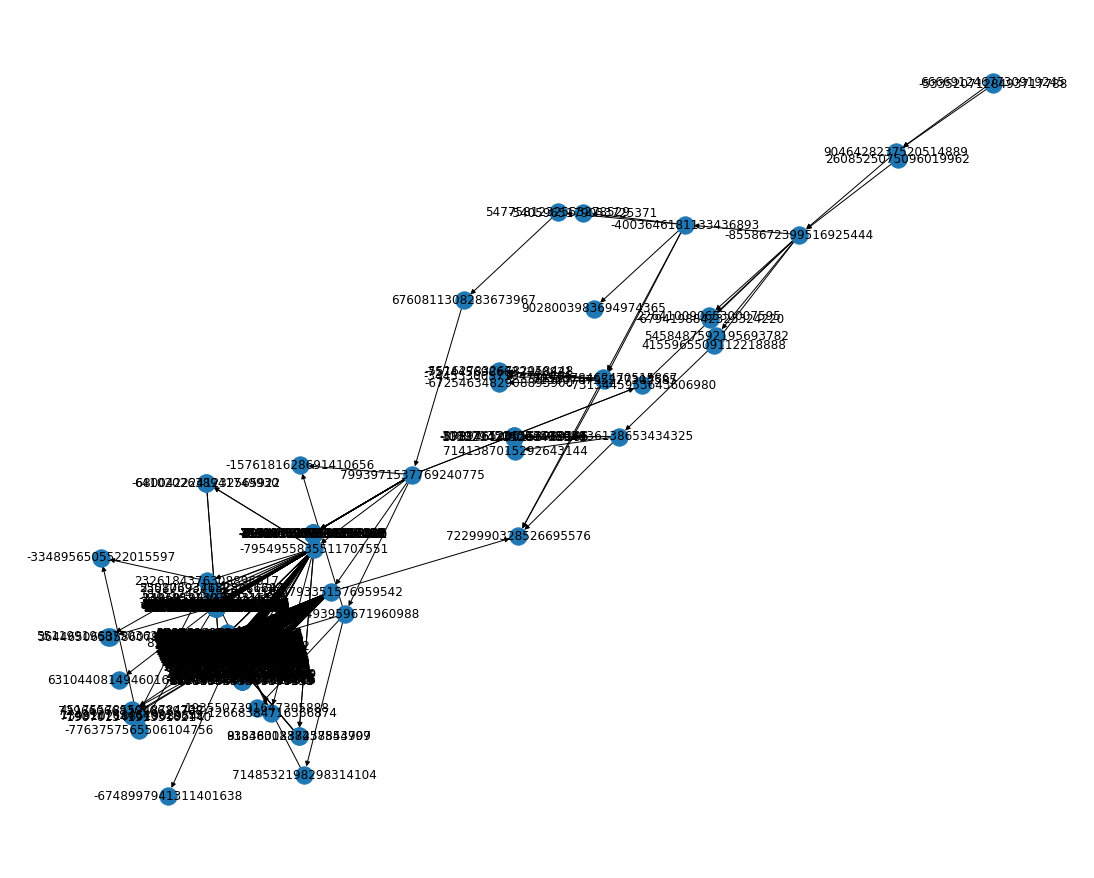

In [262]:
from matplotlib.pyplot import figure
figure(figsize=(15, 12))
nx.draw_kamada_kawai(H, with_labels=True)

# KarateClub Formatting

In [ ]:
#The graph is undirected.
G = G.to_undirected()

In [122]:
# Convert the object to JSON
#graph_json = NetworkX.graph_to_json(G)

#with open("my_graph_small.json", "w") as f:
#    json.dump(graph_json, f)

In [123]:
list(nx.isolates(G))

[]

In [124]:
G.remove_nodes_from(list(nx.isolates(G)))

In [131]:
G = G.to_undirected()
G = nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute='Orig_Label')

In [132]:
list(G.nodes(data=True))

[(0,
  {'data': (<SysMonProc> process_guid={47ab858c-cadc-5eac-2200-000000000400}),
   'Orig_Label': 7605756678949184438}),
 (1,
  {'data': (<SysMonProc> process_guid={47ab858c-e589-5eac-f803-000000000400}),
   'Orig_Label': -6941030430542843715}),
 (2,
  {'data': (<SysMonProc> process_guid={47ab858c-e296-5eac-c803-000000000400}),
   'Orig_Label': 22487237678128871}),
 (3,
  {'data': (<SysMonProc> process_guid={47ab858c-e2d4-5eac-cd03-000000000400}),
   'Orig_Label': -8298811802184468840}),
 (4,
  {'data': (<SysMonProc> process_guid={47ab858c-e37a-5eac-e003-000000000400}),
   'Orig_Label': 2409123009262189569}),
 (5,
  {'data': (<SysMonProc> process_guid={47ab858c-e2d4-5eac-cc03-000000000400}),
   'Orig_Label': 5663724664859128389}),
 (6,
  {'data': (<SysMonProc> process_guid={47ab858c-e68a-5eac-0304-000000000400}),
   'Orig_Label': -1912919121846679210}),
 (7,
  {'data': (<File> host=SCRANTON.dmevals.local full_path=C:\Windows\System32\svchost.exe),
   'Orig_Label': -46763653583354037

In [128]:
list(G.edges.data())

[(7605756678949184438,
  -6941030430542843715,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:14:17.672'},
   'edge_name': 'Launched'}),
 (7605756678949184438,
  22487237678128871,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:01:42.046'},
   'edge_name': 'Launched'}),
 (7605756678949184438,
  -8298811802184468840,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:02:44.901'},
   'edge_name': 'Launched'}),
 (7605756678949184438,
  2409123009262189569,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:05:30.108'},
   'edge_name': 'Launched'}),
 (7605756678949184438,
  5663724664859128389,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:02:44.870'},
   'edge_name': 'Launched'}),
 (7605756678949184438,
  -1912919121846679210,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:18:34.907'},
   'edge_name': 'Launched'}),
 (7605756678949184438,
  -4676365358335403721,
  {'key': 'File Of', 'data': None, 'edge_name'

In [130]:
nx.is_connected(G)

False

In [129]:
from karateclub import LabelPropagation

model = LabelPropagation()
model.fit(G)
cluster_membership = model.get_memberships()

ValueError: Graph is not connected. Please see requirements.